#  <a id='1-1'> Exploratory Yelp Data Analysis -- STA 220 Final Project

## Group: Yiming Wu, Zhuowei Chen, Chenghan Sun

## Table of Contents:
* [Section I: Project Overview and Motivations](#first-bullet)
   - [Part I: Motivation of this data science project](#sub1)
   - [Part II: Usage and organization of folder structure](#sub2)
* [Section II: Build Web Crawler ](#second-bullet)
  - [Part I: Web crawling group of cities as analysis object ](#sub3)
  - [Part II: Build Yelp web crawler](#sub4)
* [Section III: Read data from sql server into pandas](#third-bullet)
  - [Part I: Show all tables in merged yelp_all_db](#sub7)
  - [Part II: Read all crawled databases tables into DataFrame](#sub8)
  - [Part III: Data concatenation final form](#sub9)
  - [Part IV: Data cleaning and feature engineering](#sub10)
* [Section IV: Data analysis and visualization](#fourth-bullet)
  - [Part I: Restaurants ratings distribution analysis](#sub11)
  - [Part II: Restaurants categorical analysis](#sub12)
  - [Part III: Restaurants operation hours analysis](#sub13)
  - [Part IV: Top 25 restaurants reviews distribution analysis based on cities](#sub14)
  - [Part V: Restaurants geo-spatial analysis](#fifth-bullet)
  - [Part VI: Other categorical variables analysis¶](#fifth-bullet)
  
* [Section V: Restaurants rating prediction](#fifth-bullet)
* [Section VI: Future works](#sixth-bullet)

## Section I: Project Overview and Motivations <a class="anchor" id="first-bullet"></a>

**Note: This section contains same information as README.md**

### Part I: Motivation of this data science project <a class="anchor" id="sub1"></a>

As we expected, in this era of information exposion, people are keen to use data to reveal underlying patterns and behaviors from macro perspectives. Thus, no surprise that there already existed numerous data science projects which broadly focused on commercial datasets. From another aspect, with the rapid development and implementation of Machine Learning algorithms, majority of these projects heavily focused on data forecasting and general insights, such as conducting sentiment analysis on tweets. However, several questions remained to be answer:

- What if we don't have available datasets? 
    - How should we deal with massive and mixed raw data?
- As data analysts / scientists, how should we explain and deliver the data insights to non-experts?
- Could we optimize the data pipeline and analysis?

These above questions need to be carefully considered before implementation of any Machine Learning algorithms, and play an important role in data science field. Thus, we want to highlight potential solutions and benchmark the above questions in this project:

- Implement web crawler technologies to collect raw dataset
    - Perfrom data cleaning and feature engineering on the crawled dataset
- Perfrom exploratory data analysis and gain data insights using graphical visualization tools
- Create automatic data pipeline through the whole project

In this project, we choose to perform above strategies on Yelp (https://www.yelp.com/) for benchmarking purpose. Yelp is a great data repository which thrives on the numerous descriptive features that are provided by owners of local restaurants. It is of considerable value to analyze Yelp data and find out whether they help in directing the performance of restaurant or whether restaurant performance is indeed dictated by other factors. given the context: 

- **This project is heavily focused on:**
    - 1. Project organization, writeup readability, and overall conclusions
        - This part will be separately explained in the Part II: Usage and organization of folder structure.
    - 2. Code quality, readability, and efficiency
        - We grouped code functionalities by different classes. See details in Part II: Usage and organization of folder structure.
    - 3. Scientific programming and custom algorithms
        - We design and implement many unique algorithms for efficient data processing, details in Folder: Build_Craler and Codebase.
    - 4. Data munging
        - We export data from sql server to DataFrame, and perfromed extensive data munging to perfrom effcient analysis.
    - 5. Data visualization
        - We perfromed data visualization extensively on all features we crawled from Yelp, and made comments on insights in the graphical information.
    - 6. Data extraction
        - We highlight the spirit of web techlogies, especially on wed crawler. We built our own unique code (see Build_Crawler folder) to collect data. In addition, this module could be easily modified to crawl even more data from Yelp, or apply to other websites based on similar principle.
    - 7. Data storage and big data
        - We deigned the data pipeline to store all data into relational database and interact through SQL queries.
    - 8. Statistics and machine learning
        - We provided some modeling (e.g. classification) and highlight the data insights and advice for future works.

### Part II: Usage and organization of folder structure <a class="anchor" id="sub2"></a>

**There are fours major folders in the submitted folder:**
- 1. Notebooks
    - Main_notebook.ipynb:
        - Contains all project introductions, strcutures, explanations, observations and comments, visualizations, modelings and summaries. Please refer this notebook as principal line of the project.
        
        
- 2. Build_Crawler:

    - We built a seperate scrapy-based Yelp web crawling module into this folder. As a individual module, this means it could be easily modified to crawl even more user-specified data from Yelp, or apply this crawling method to other websites based on similar principle. The main class lives in Build_Crawler/Yelp/spiders/YelpSpider.py, and other help classes and pipelines were also built in Build_Crawler/Yelp. We automate the data collection process by implementing SQL queries. All data were automatically stored into local SQL server.  


- 3. Database:
    - We have four sub-folders:
        - yelp_dbs:
            - `yelp_db_1_6.sql` contains information of the following cities:  
            |-----------------------|  
            | Tables_in_yelp_db_1_6 |  
            |-----------------------|  
            | yelp_fresno           |  
            | yelp_los_angeles      |  
            | yelp_sacramento       |  
            | yelp_san_diego        |  
            | yelp_san_francisco    |  
            | yelp_san_jose         |  
            |-----------------------|    
            6 rows in set (0.00 sec) 
            - `yelp_db_7_12.sql` contains information of the following cities:  
            |------------------------|  
            | Tables_in_yelp_db_7_12 |  
            |------------------------|  
            | yelp_Anaheim           |  
            | yelp_Bakersfield       |  
            | yelp_Long_Beach        |  
            | yelp_Oakland           |  
            | yelp_Riverside         |  
            | yelp_Santa_Ana         |  
            |------------------------|   
            6 rows in set (0.00 sec)  
        - cities_csv:
            - Contains information of crawled California city list from https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population. Please refer Section I, Part I for more details. 
        - resource_csv:
            - Contains information of fipsDict downloaded from https://data.world/niccolley/us-zipcode-to-county-state. We map fips code to zip code and corresponding city information. This .csv file will be used in Geo-Spatial analysis in Section III, Part V. 
            
            
- 4. Codebase
    - There following .py file lives in this folder:
        - db_utils.py: Use for database (SQL server) connection and extract data into dataframe for analysis.
        - helper_fe.py: contained all data cleaning and feature engineering.
        - ratdist_plot.py: ratings distribution plots
        - category_plot.py: categorical plots
        - ophrs_plot.py: operation hrs plots
        - helper_ml.py: ML plots


In [1]:
# load pkgs 
import pandas as pd
import sys
import numpy as np
import os
from urllib.request import urlopen
import re
import string
import json
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('ggplot')
import seaborn as sns
!pip install plotnine
from plotnine import *
!pip install wordcloud
from wordcloud import WordCloud 
!pip install pyecharts
from pyecharts.charts import Pie
from pyecharts import options as opts
import plotly.express as px

sys.path.insert(0, '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
import pymysql
from bs4 import BeautifulSoup

# Machine Learning pkgs
from sklearn import preprocessing, metrics, neighbors, model_selection, svm, ensemble
!pip install xgboost
import xgboost as xgb

**<span style="color:blue">Import helper classes and functions which lives in `Codebase`.</span>**

In [2]:
# load helper functions from ../Codebase
sys.path.insert(0, '../Codebase/')
sys.path.insert(0, '/usr/local/mysql/bin')
from db_utils import YelpDb
from helper_fe import *
from ratdist_plot import RatdistPlot
from category_plot import CategoryPlot
from ophrs_plot import OpHrsPlot
from helper_ml import *

## Section II: Build Web Crawler <a class="anchor" id="second-bullet"></a>

### Part I:  Web crawling group of cities as analysis object <a class="anchor" id="sub3"></a>

First, we need to determine which cities in California should our analysis focused on. The primary concerns were, first, we will need to crawl Yelp website, and based on our trial and error process, **our IP address were easily got banned by Yelp**. So we investigate tremendous amount of time on running the crawler and collect the data, and decide not to crawl too many cities (even if our code could do that). Due to this reason, we only crawled selected cities based on following links:   
- Resource 1: https://patch.com/california/lajolla/ca-cities-rank-among-best-big-cities-live gives best 12 big cities in California, which for sure, worth our attention.  
- Resource 2: https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population gives rank of cities in California based on populations.  

We perfromed the following simple web crawling on this two resources. 

In [3]:
# Resource 1:
# open url connection 
from urllib.request import urlopen
link = 'https://patch.com/california/lajolla/ca-cities-rank-among-best-big-cities-live'
html = urlopen(link).read()
soup = BeautifulSoup(html, features='html')
print(soup.text)
# use class to narrow search, based on observation 
target_level = soup.find('section', {"class": "page__content"})
target_level_2 = target_level.find_all('ol')[1]
target_level_3 = target_level_2.find_all('li')
cali_cities = []
token_list = []
for info in target_level_3:
    cali_cities.append(info.get_text(strip=True))
for i in cali_cities:
    flag = re.findall("[A-Za-z ]", i)
    if flag:
        token = "".join(flag)
        token_list.append(token)
print(f'The list of best big cities in California are: {token_list[:12]}')

CA Cities Rank Among Best Big Cities To Live In | La Jolla, CA PatchSkip to main contentLa Jolla, CASubscribeNews FeedEventsLocal BusinessesClassifiedsPostAdvertiseNearbyDel Mar-Carmel Valley NewsSan Diego NewsCoronado NewsEncinitas NewsLemon Grove NewsRancho Bernardo-4s Ranch NewsSantee NewsLa Mesa-Mount Helix NewsPoway NewsCarlsbad NewsLocal NewsCommunity CornerCrime & SafetyPolitics & GovernmentSchoolsTraffic & TransitObituariesPersonal FinanceNeighbor NewsBest OfSeasonal & HolidaysWeatherArts & EntertainmentBusiness & TechHealth & WellnessHome & GardenSportsTravelKids & FamilyPetsRestaurants & BarsLocalStreamEventsLocal BusinessesClassifiedsReal EstateReal Estate ListingsReal Estate NewsSee all communitiesAdvertiseNearby CommunitiesDel Mar-Carmel Valley, CASan Diego, CACoronado, CAEncinitas, CALemon Grove, CARancho Bernardo-4s Ranch, CASantee, CALa Mesa-Mount Helix, CAPoway, CACarlsbad, CAState EditionCaliforniaNational EditionTop National NewsSee All CommunitiesCommunity CornerCA 

In [4]:
# Resource 2:
link = 'https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population'
html = urlopen(link).read()

soup = BeautifulSoup(html, features="html")
cities = []
table = soup.find('table', {"class": "wikitable sortable"})
rows = table.find_all("tr")
for row in rows[1:]:
    city = row.find_all("td")[1].get_text(strip=True)
    cities.append(city)
print(f'The list of top 12 cities with most populations in California are: {cities[:12]}')

The list of top 12 cities with most populations in California are: ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno', 'Sacramento', 'Long Beach', 'Oakland', 'Bakersfield', 'Anaheim', 'Stockton', 'Riverside']


**Observation and comments**: 

From the above results, we surprisingly found that all the extracted 12 cities duplicated in these two resources. It's actually easy to understand: best city usually attract more people. **<span style="color:blue">Thus, we determined this group of 12 cities as our analysis object set</span>.**

### Part II: Build Yelp web crawler <a class="anchor" id="sub4"></a>

Secondly, the core part of our Web Crawler section is to perfrom data collection on Yelp. We built a seperate scrapy-based Yelp web crawling module into folder: `Build_Crawler`. 

Here we explain some selective functions of the module, which we believe should cover most of the important functionalities. The main class lives in `Build_Crawler/Yelp/spiders/YelpSpider.py`. To execute the crawler, run `scrapy crawl YelpSpider` under scrapy root directory `Build_Crawler/Yelp/`. 

we specified several of our crawled setting in that script:
- 1. Based on observations of the websites, we decide to crawl the following features:
    - Name
    - Address
    - Category (descriptive words of the restaurants)
    - Price
    - Rating
    - Reviews (number of reviews of the restaurants)
    - hours-table (operation hours)
    - Amenities (some detailed propertyies, e.g. vegan option)
    
    
- 2. We did some feature splitting as we noticed that, on the one hand, features hours-table and Amenities were very long string and may containing redundant infromation; one the other hand, since they were long string, more additional memory need to be allocated when performing `CREATE TABLE` query. Thus, we further split these features into following sub features:
    - break hours-table into 7 features:
        - Mon to Sun: 7 features containing operation hours for the restaurants
    - break Amenities into 9 selected features:
        - Delivery (binary)
        - Wi_Fi (binary)
        - Takes_Reservations (binary)
        - Parking (descriptive)
        - Vegetarian_Options (binary)
        - Accepts_Credit_Cards (binary)
        - Accepts_Apple_Pay (binary)
        - Accepts_Google_Pay (binary)
        - Take_out (binary)
        
Up to this point, a total of **22 features** were created and ready to be crawled from Yelp. 

Other help classes and pipelines were also built in Build_Crawler/Yelp/. We automate the data collection process by implementing SQL queries in script `Build_Crawler/Yelp/pipelines.py` and `Build_Crawler/Yelp/items.py` so that **all data were automatically stored into local SQL server**. 

**<span style="color:blue">Note: Please go to the sub folder `Build_Crawler` for more details if you are interest</span>**

## Section III: Read data from sql server into pandas

We break this section into three sub sections:
- Part I: Show all tables in yelp_all_db
- Part II: Read all crawled databases tables into DataFrame
- Part III: Data concatenation final form
- Part IV: Data cleaning and feature engineering 

After this above workflow, we expect a clean version of yelp data to be ready for EDA and visualization. 

### Part I: Show all tables in merged yelp_all_db

To allocate the work load and try to prevent ban of IP address, we ran the Yelp crawler on two machines. Each of the machine was in charge of data of 6 cities. After finish the crawling process, we dumped the database into two .sql files by `mysqldump --add-drop-table -u root -p name_of_your_db > export_dn_name.sql`, and provided in folder `Database/yelp_dbs/yelp_db_1_6.sql` and `Database/yelp_dbs/yelp_db_7_12.sql`.  

In order to perform aggregate analysis, the two databases was murged in one local mysql server by source the other database `source your_sql_file_path`. The following cell showed all tables from the unified database: yelp_all_db. 

**<span style="color:blue">In this part, please refer `Codebase/db_utils.py` as helper class.</span>**

In [5]:
# build DB connections from mysql server 
yelp_db_group = YelpDb("yelp_db")  # cities 1-12 (sourced multiple databases)

# show tables
sql_tabs = "show TABLES;"
yelp_db_group.execute(sql_tabs)
yelp_db_group.fetch_all()

(('yelp_Anaheim',),
 ('yelp_Anaheim_reviews',),
 ('yelp_Bakersfield',),
 ('yelp_Bakersfield_reviews',),
 ('yelp_Fresno',),
 ('yelp_Fresno_reviews',),
 ('yelp_Long_Beach',),
 ('yelp_Long_Beach_reviews',),
 ('yelp_Los_Angeles',),
 ('yelp_Los_Angeles_reviews',),
 ('yelp_Oakland',),
 ('yelp_Oakland_reviews',),
 ('yelp_Riverside',),
 ('yelp_Riverside_reviews',),
 ('yelp_Sacramento',),
 ('yelp_Sacramento_reviews',),
 ('yelp_San_Diego',),
 ('yelp_San_Diego_reviews',),
 ('yelp_San_Francisco',),
 ('yelp_San_Francisco_reviews',),
 ('yelp_San_Jose',),
 ('yelp_San_Jose_reviews',),
 ('yelp_Santa_Ana',),
 ('yelp_Santa_Ana_reviews',))

**Observation and comments:**

We see 12 tables lived in the database. 

### Part II: Read all crawled databases tables into DataFrame 

Here we read each of the table into DataFrame for analysis, and visualize the summary statistics.

**<span style="color:blue">In this part, please refer `Codebase/db_utils.py` as helper class.</span>**

In [6]:
# Table 1
yelp_df_la = yelp_db_group.db_to_df("yelp_Los_Angeles")
yelp_df_la.sample(1)

Name                                       Address  \
74  Tu Madre - West Hollywood  1111 N Hayworth Ave West Hollywood, CA 90046   

                                      Category Price           Rating Reviews  \
74  Mexican, Breakfast & Brunch, Cocktail Bars    $$  (1,004 reviews)     4.1   

                    Mon                  Tue                  Wed  \
74  11:00 AM - 11:00 PM  11:00 AM - 11:00 PM  11:00 AM - 11:00 PM   

                    Thu                             Fri  \
74  11:00 AM - 11:00 PM  11:00 AM - 12:00 AM (Next day)   

                               Sat                  Sun  
74  10:00 AM - 12:00 AM (Next day)  10:00 AM - 11:00 PM

In [7]:
# Table 2
yelp_df_sd = yelp_db_group.db_to_df("yelp_san_diego")
yelp_df_sd.sample(1)

Name                              Address  \
65  ARLO  500 Hotel Cir N San Diego, CA 92108   

                                           Category Price         Rating  \
65  New American, Cocktail Bars, Breakfast & Brunch   $$$  (297 reviews)   

   Reviews                 Mon                 Tue                 Wed  \
65     4.2  7:00 AM - 11:00 AM  7:00 AM - 11:00 AM  7:00 AM - 11:00 AM   

                   Thu                 Fri                Sat  \
65  7:00 AM - 11:00 AM  7:00 AM - 11:00 AM  8:00 AM - 2:00 PM   

                  Sun  
65  8:00 AM - 2:00 PM

In [8]:
# Table 3
yelp_df_sj = yelp_db_group.db_to_df("yelp_san_jose")
yelp_df_sj.sample(1)

Name                         Address  \
130  Wasai  949 Ruff Dr San Jose, CA 95110   

                                 Category Price       Rating Reviews     Mon  \
130  Food Delivery Services, Comfort Food  None  (6 reviews)     4.3  Closed   

                    Tue                 Wed                 Thu  \
130  11:00 AM - 7:00 PM  11:00 AM - 7:00 PM  11:00 AM - 7:00 PM   

                    Fri                 Sat     Sun  
130  11:00 AM - 7:00 PM  11:00 AM - 7:00 PM  Closed

In [9]:
# Table 4
yelp_df_sf = yelp_db_group.db_to_df("yelp_San_Francisco")
yelp_df_sf.sample(1)

Name                                 Address  \
69  Limoncello  1400 Sutter St San Francisco, CA 94109   

                                   Category Price           Rating Reviews  \
69  Sandwiches, Delis, Beer, Wine & Spirits    $$  (1,726 reviews)     4.8   

                  Mon                Tue                Wed  \
69  9:00 AM - 8:00 PM  9:00 AM - 8:00 PM  9:00 AM - 8:00 PM   

                  Thu                Fri                Sat                Sun  
69  9:00 AM - 8:00 PM  9:00 AM - 9:00 PM  9:00 AM - 9:00 PM  9:00 AM - 8:00 PM

In [10]:
# Table 5
yelp_df_fr = yelp_db_group.db_to_df("yelp_fresno")
yelp_df_fr.sample(1)

Name Address Category Price Rating Reviews   Mon   Tue   Wed   Thu   Fri  \
43  None    None           None   None    None  None  None  None  None  None   

     Sat   Sun  
43  None  None

In [11]:
# Table 6
yelp_df_sc = yelp_db_group.db_to_df("yelp_sacramento")
yelp_df_sc.sample(1)

Name                                  Address Category  \
119  Jando's Mexican Food  4591 Fruitridge Rd Sacramrnto, CA 95820  Mexican   

    Price       Rating Reviews     Mon                 Tue  \
119  None  (9 reviews)     5.0  Closed  10:00 AM - 8:00 PM   

                    Wed                 Thu                 Fri  \
119  10:00 AM - 8:00 PM  10:00 AM - 8:00 PM  10:00 AM - 8:00 PM   

                   Sat                Sun  
119  9:00 AM - 8:00 PM  9:00 AM - 8:00 PM

In [12]:
# Table 7
yelp_df_lb = yelp_db_group.db_to_df("yelp_Long_Beach")
yelp_df_lb.sample(1)

Name                                            Address  \
0  The Bungalow Long Beach  6400 E Pacific Coast Hwy Ste 200 Long Beach, C...   

                             Category Price         Rating Reviews     Mon  \
0  Lounges, Breakfast & Brunch, Pizza  None  (143 reviews)     3.6  Closed   

      Tue                           Wed                           Thu  \
0  Closed  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   

                            Fri                            Sat  \
0  5:00 PM - 2:00 AM (Next day)  12:00 PM - 2:00 AM (Next day)   

                   Sun  
0  12:00 PM - 10:00 PM

In [13]:
# Table 8
yelp_df_ok = yelp_db_group.db_to_df("yelp_Oakland")
yelp_df_ok.sample(1)

Name                                  Address  \
54  Alamar Dominican Kitchen  100 Grand Ave Ste 111 Oakland, CA 94612   

                    Category Price         Rating Reviews     Mon     Tue  \
54  Cocktail Bars, Dominican    $$  (623 reviews)     4.1  Closed  Closed   

                   Wed                 Thu                 Fri  \
54  5:00 PM - 10:00 PM  5:00 PM - 10:00 PM  5:00 PM - 10:00 PM   

                   Sat                 Sun  
54  5:00 PM - 10:00 PM  5:00 PM - 10:00 PM

In [14]:
# Table 9
yelp_df_bf = yelp_db_group.db_to_df("yelp_Bakersfield")
yelp_df_bf.sample(1)

Name                            Address  \
14  Sizzler  900 Real Rd Bakersfield, CA 93309   

                          Category Price         Rating Reviews  \
14  Seafood, Steakhouses, American    $$  (269 reviews)     3.9   

                   Mon                 Tue                 Wed  \
14  11:00 AM - 9:00 PM  11:00 AM - 9:00 PM  11:00 AM - 9:00 PM   

                   Thu                 Fri                 Sat  \
14  11:00 AM - 9:00 PM  11:00 AM - 9:00 PM  11:00 AM - 9:00 PM   

                   Sun  
14  11:00 AM - 9:00 PM

In [15]:
# Table 10
yelp_df_ah = yelp_db_group.db_to_df("yelp_Anaheim")
yelp_df_ah.sample(1)

Name                            Address  Category  \
13  Yoka Yoka Japanese Cuisine  1560 S Lewis St Anaheim, CA 92805  Japanese   

   Price       Rating Reviews                           Mon  \
13  None  (9 reviews)     4.2  5:00 PM - 1:00 AM (Next day)   

                             Tue                           Wed  \
13  5:00 PM - 1:00 AM (Next day)  5:00 PM - 1:00 AM (Next day)   

                             Thu                           Fri  \
13  5:00 PM - 1:00 AM (Next day)  5:00 PM - 1:00 AM (Next day)   

                             Sat     Sun  
13  5:00 PM - 1:00 AM (Next day)  Closed

In [16]:
# Table 11
yelp_df_sa = yelp_db_group.db_to_df("yelp_Santa_Ana")
yelp_df_sa.sample(1)

Name                                        Address  \
2  Lani's Hawaiian BBQ  2509 S Broadway Unit K125 Santa Ana, CA 92707   

             Category Price       Rating Reviews  \
2  Hawaiian, Barbeque  None  (7 reviews)     4.1   

                            Mon                           Tue  \
2  6:00 PM - 2:00 AM (Next day)  6:00 PM - 2:00 AM (Next day)   

                            Wed                           Thu  \
2  6:00 PM - 2:00 AM (Next day)  6:00 PM - 2:00 AM (Next day)   

                            Fri                           Sat  \
2  6:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   

                            Sun  
2  6:00 PM - 2:00 AM (Next day)

In [17]:
# Table 12
yelp_df_rs = yelp_db_group.db_to_df("yelp_Riverside")
yelp_df_rs.sample(1)

Name                                 Address Category Price  \
15  El Habanero  6160 Arlington Ave Riverside, CA 92504  Mexican    $$   

           Rating Reviews                Mon                Tue  \
15  (740 reviews)     4.3  9:00 AM - 8:00 PM  9:00 AM - 8:00 PM   

                  Wed                Thu                Fri  \
15  9:00 AM - 8:00 PM  9:00 AM - 8:00 PM  9:00 AM - 8:00 PM   

                  Sat                Sun  
15  9:00 AM - 8:00 PM  9:00 AM - 3:00 PM

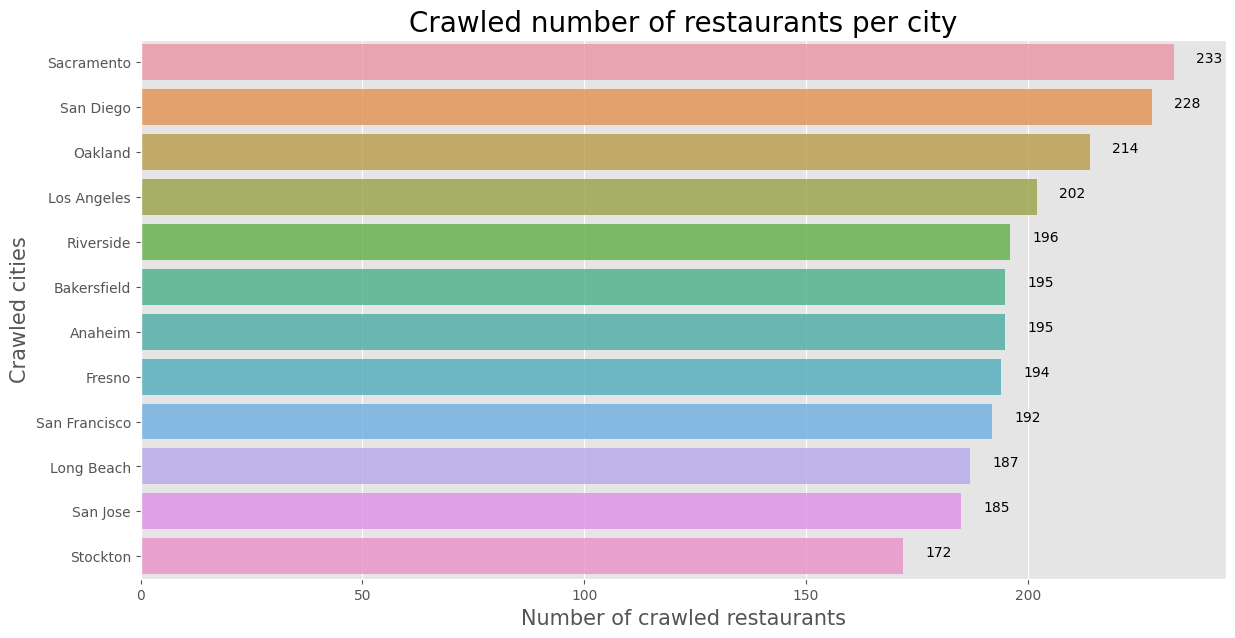

In [18]:
# initial data components plot
# make stats plot of how many restaurants per city were crawled

city_list = cities[:12]
rstats_list = [yelp_df_la.shape[0], yelp_df_sd.shape[0], yelp_df_sj.shape[0], yelp_df_sf.shape[0],
               yelp_df_fr.shape[0], yelp_df_sc.shape[0], yelp_df_lb.shape[0], yelp_df_ok.shape[0],
               yelp_df_bf.shape[0], yelp_df_ah.shape[0], yelp_df_sa.shape[0], yelp_df_rs.shape[0]]
comp_dict = {"Cities": city_list, "Restaurants_number": rstats_list}
comp_df = pd.DataFrame(data=comp_dict).sort_values("Restaurants_number", ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=comp_df.Restaurants_number, y=comp_df.Cities, alpha=0.8)
plt.title("Crawled number of restaurants per city", fontsize=20)
plt.ylabel('Crawled cities', fontsize=15)
plt.xlabel('Number of crawled restaurants', fontsize=15)

# adding the text labels
rects = ax.patches 
labels = comp_df.Restaurants_number.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() + 5, height/2 + rect.get_y(), label, ha='left')
plt.show()

**Observation and comments:**

From the above figure, we saw the components of our whole dataset. Yelp default to give maximum of 990 search results for each city, so that the maximum row of data that we coud collect would be 990 per city. We also missed several records on Fresno, Long Beach, Bakersfield, Riverside, and Anaheim. However, the mixture of the whole yelp dataset would inherit equal-amount of data contributions based on city category, which prevent from potential location bias that could influence the integrity of analysis. 

### Part III: Data concatenation final form 

Here we concatenate all 12 dataframes into a single dataframe: yelp_df_all, and show the shape of the df. 

In [19]:
# Data concatenation
yelp_df_all = pd.concat([yelp_df_la, yelp_df_sd, yelp_df_sj, yelp_df_sf,
                        yelp_df_fr, yelp_df_sc, yelp_df_lb, yelp_df_ok,
                        yelp_df_bf, yelp_df_ah, yelp_df_sa, yelp_df_rs]).reset_index(drop=True)
print(f'Yelp data for all cities: number of rows (restaurants) = {yelp_df_all.shape[0]}')
print(f'number of columns (features) = {yelp_df_all.shape[1]}')
yelp_df_all.sample(3)

Yelp data for all cities: number of rows (restaurants) = 2393
number of columns (features) = 13


Name                                       Address  \
1054                 None                                          None   
861       Vampire Penguin  1102 E Champlain Dr Ste 108 Fresno, CA 93720   
2096  Mentirosa Resto Bar         104 South Main St Santa Ana, CA 92701   

                              Category Price         Rating Reviews     Mon  \
1054                                    None           None    None    None   
861   Desserts, Shaved Snow, Creperies    $$  (108 reviews)     4.7  Closed   
2096              Steakhouses, Seafood  None     (1 review)     5.0  Closed   

                      Tue                  Wed                  Thu  \
1054                 None                 None                 None   
861     2:00 PM - 8:30 PM    2:00 PM - 8:30 PM    2:00 PM - 8:30 PM   
2096  11:00 AM - 10:00 PM  11:00 AM - 10:00 PM  11:00 AM - 10:00 PM   

                                Fri                            Sat  \
1054                           None                           None   
861              12:00 PM - 9:00 PM             12:00 PM - 9:00 PM   
2096  9:30 AM - 12:00 AM (Next day)  9:30 AM - 12:00 AM (Next day)   

                                Sun  
1054                           None  
861              12:00 PM - 8:00 PM  
2096  9:30 AM - 12:00 AM (Next day)

**Observation and comments:**

In conclusion, this crawled dataset contained **11869** records of restaurants and **22** features as we expected.

### Part IV: Data cleaning and feature engineering

In this part, we perfromed extensive feature engineering and data cleaning procedure.
- 1. We dropped duplicates data based on primary key. For example, there would exist several cases that the restaurants located between the boundary of two cities. 
- 2. Since we had many NaN values from the crawled raw data, we fill all missing values or values filled with str "null" by "Unknown".
- 3. We applied feature engineering on original open hours Mon to Sun, by extraction and formation of 14 new int features (7: MonOpen - SunOpen; 7: MonClose - SunClose).
- 4. We applied feature engineering on Address to extract new feature called "ZIP", which would be used in the later geo-spatial analysis.
- 5. Dropped feature "Parking" as we had four additional features which could replace it
- 6. No need to re-engineer other features. 

**<span style="color:blue">In this part, please refer `Codebase/helper_fe.py` as multiple helper functions.</span>**

In [20]:
# drop duplicates data based on Name as primary key
yelp_df_all = yelp_df_all.drop_duplicates()
yelp_df_all = yelp_df_all.reset_index()

In [21]:
# fill NAN
exceptions(yelp_df_all, verbose=True)
yelp_clean_df = yelp_df_all.applymap(find_null)

No exceptions detected


In [22]:
# feature engineering on open hours 
#parking_type=['street', 'lot', 'garage', 'valet']

yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 
               'Sun']] = yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].applymap(get_open_time)
#yelp_clean_df[parking_type] = yelp_clean_df.Parking.apply(get_parking)  # create four new features 

yelp_clean_df[['MonOpen', 'TueOpen', 'WedOpen', 'ThuOpen', 'FriOpen', 'SatOpen', 
               'SunOpen']] = yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                                            'Sat', 'Sun']].applymap(grab_start_open)  # 7 new features

yelp_clean_df[['MonClose', 'TueClose', 'WedClose', 'ThuClose', 'FriClose', 'SatClose', 
               'SunClose']] = yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                                            'Sat', 'Sun']].applymap(grab_end_open)  # 7 new features

In [23]:
# get ZIP feature 
yelp_clean_df['ZIP'] = yelp_clean_df.Address.apply(get_ZIP)

In [24]:
# drop feature: `Parking` since we had four additional features which could replace it
# yelp_clean_df = yelp_clean_df.drop(['Parking'],axis=1)

In [25]:
# no need to do further feature engineering to `Price` since it only contains 
# four type of responses without "Unknown"
yelp_clean_df.Price.value_counts()

Price
$$         1440
Unknown     489
$$$         182
$            98
$$$$         58
Name: count, dtype: int64

In [26]:
print(yelp_clean_df.shape)
yelp_clean_df.sample(3)

(2267, 29)


index                  Name  \
823    880  Outlaws BBQ Catering   
2161  2283           Sushi Asahi   
219    228    Homestyle Hawaiian   

                                              Address  \
823                              Verified by Business   
2161  2955 Van Buren Blvd Ste D-2 Riverside, CA 92503   
219          7524 Mesa College Dr San Diego, CA 92111   

                      Category    Price           Rating Reviews  \
823         Caterers, Barbeque  Unknown     (22 reviews)     5.0   
2161      Sushi Bars, Japanese       $$  (3,199 reviews)     3.8   
219   Hawaiian, Salad, Seafood       $$  (2,087 reviews)     3.9   

                          Mon                      Tue  \
823    [[8:00 AM ,  9:00 PM]]   [[8:00 AM ,  9:00 PM]]   
2161  [[11:30 AM ,  9:30 PM]]  [[11:30 AM ,  9:30 PM]]   
219   [[11:00 AM ,  8:00 PM]]  [[11:00 AM ,  8:00 PM]]   

                          Wed  ... SatOpen SunOpen MonClose TueClose  \
823    [[8:00 AM ,  9:00 PM]]  ...     0.0     0.0     24.0     24.0   
2161  [[11:30 AM ,  9:30 PM]]  ...     0.0     0.0     24.0     24.0   
219   [[11:00 AM ,  8:00 PM]]  ...     0.0     0.0     24.0     24.0   

      WedClose  ThuClose  FriClose  SatClose  SunClose        ZIP  
823       24.0      24.0      24.0      24.0      24.0    Unknown  
2161      24.0      24.0      24.0      24.0      24.0   CA 92503  
219       24.0      24.0      24.0      24.0      24.0   CA 92111  

[3 rows x 29 columns]

**Observation and comments:**

From the above analysis, the whole dataset was reduced to **9493 rows** and the features were increased to **41**. This clean dataset: yelp_clean_df would used for next section.

## Section IV: Data analysis and visualization

We break this section into six sub sections:
- Part I: Restaurants ratings distribution analysis
- Part II: Restaurants categorical analysis
- Part III: Restaurants operation hours analysis
- Part IV: Restaurants reviews distribution analysis based on cities
- Part V: Restaurants geo-spatial analysis
- Part VI: Other categorical variables analysis

After this above workflow, we expect to gain strong data insights from graphical methods. 

### Part I: Restaurants ratings distribution analysis 

- 1. Overall ratings distributions.
- 2. Individual cities ratings distributions.

**<span style="color:blue">In this part, please refer `Codebase/ratdist_plot.py` as helper plotting class.</span>**

In [27]:
yelp_clean_df

index                        Name  \
0     Unknown              The Front Yard   
1           1             King Chang - LA   
2           2               Burnin' Shell   
3           3                     Ka'teen   
4           4                       Cento   
...       ...                         ...   
2262     2388              The Salted Pig   
2263     2389                  Stagecoach   
2264     2390      Flat Top Bar and Grill   
2265     2391  Smoke & Fire Social Eatery   
2266     2392      The Rustik Fork Eatery   

                                                Address  \
0           4222 Vineland Ave North Hollywood, CA 91602   
1                   3732 W 6th St Los Angeles, CA 90020   
2              3916 Wilshire Blvd Los Angeles, CA 90010   
3                  6516 Selma Ave Los Angeles, CA 90028   
4               4921 W Adams Blvd Los Angeles, CA 90016   
...                                                 ...   
2262           3750 Main St Ste 103 Riverside, CA 92501   
2263           3775 Tyler St Ste 3C Riverside, CA 92503   
2264           17960 Van Buren Blvd Riverside, CA 92508   
2265    5225 Canyon Crest Dr Unit 9 Riverside, CA 92507   
2266  1355 E Alessandro Blvd Ste 101 Riverside, CA 9...   

                                               Category    Price  \
0     New American, Breakfast & Brunch, Beer, Wine &...       $$   
1                Korean, Barbeque, Beer, Wine & Spirits  Unknown   
2                             Seafood, Korean, Barbeque      $$$   
3            Mexican, Cocktail Bars, Breakfast & Brunch  Unknown   
4            Italian, Mediterranean, Tapas/Small Plates       $$   
...                                                 ...      ...   
2262       Gastropubs, New American, Breakfast & Brunch       $$   
2263                   Barbeque, Burgers, Cocktail Bars       $$   
2264                        Pubs, Steakhouses, American       $$   
2265                   Barbeque, American, Comfort Food       $$   
2266                  Gastropubs, Burgers, New American       $$   

               Rating Reviews                                  Mon  \
0     (3,509 reviews)     4.0              [[7:00 AM ,  11:00 AM]]   
1       (491 reviews)     4.8   [[4:00 PM ,  12:00 AM (Next day)]]   
2       (147 reviews)     4.6   [[3:00 PM ,  12:00 AM (Next day)]]   
3       (675 reviews)     4.0                               Closed   
4       (740 reviews)     4.5              [[5:00 PM ,  10:00 PM]]   
...               ...     ...                                  ...   
2262  (3,287 reviews)     3.8                               Closed   
2263    (119 reviews)     4.3              [[11:00 AM ,  9:30 PM]]   
2264    (412 reviews)     3.9  [[11:00 AM ,  12:00 AM (Next day)]]   
2265  (1,430 reviews)     4.4             [[11:00 AM ,  11:00 PM]]   
2266    (943 reviews)     4.3                               Closed   

                                      Tue  \
0                 [[7:00 AM ,  11:00 AM]]   
1      [[4:00 PM ,  12:00 AM (Next day)]]   
2      [[3:00 PM ,  12:00 AM (Next day)]]   
3                  [[6:00 PM ,  9:00 PM]]   
4                 [[5:00 PM ,  10:00 PM]]   
...                                   ...   
2262                               Closed   
2263              [[11:00 AM ,  9:30 PM]]   
2264  [[11:00 AM ,  12:00 AM (Next day)]]   
2265             [[11:00 AM ,  11:00 PM]]   
2266              [[11:00 AM ,  2:00 PM]]   

                                      Wed  ... SatOpen SunOpen MonClose  \
0                 [[7:00 AM ,  11:00 AM]]  ...     0.0     0.0     24.0   
1      [[4:00 PM ,  12:00 AM (Next day)]]  ...     0.0     0.0     24.0   
2      [[3:00 PM ,  12:00 AM (Next day)]]  ...     0.0     0.0     24.0   
3                  [[6:00 PM ,  9:00 PM]]  ...     0.0     0.0      NaN   
4                 [[5:00 PM ,  10:00 PM]]  ...     0.0     0.0     24.0   
...                                   ...  ...     ...     ...      ...   
2262              [[11:30 AM ,  9:

In [28]:
class RatdistPlot:
    def __init__(self, df):
        self.df = df
        
    def plot(self, font_size, title, text_height):
        """Make ratings distribution plot"""
        counts = self.df['Reviews'].value_counts().sort_index()
        ax = sns.barplot(x=counts.index, y=counts.values, alpha=0.8)
        plt.title(title, fontsize=font_size)
        plt.xlabel("Ratings", fontsize=font_size)
        plt.ylabel("Number of Hotels", fontsize=font_size)

        # Add text labels
        for rect, count in zip(ax.patches, counts.values):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + text_height, count,
                    ha='center', va='bottom')
            
    def clean_each_city_df(self):
        exceptions(self.df)
        clean_df = self.df.applymap(find_null)
        return clean_df


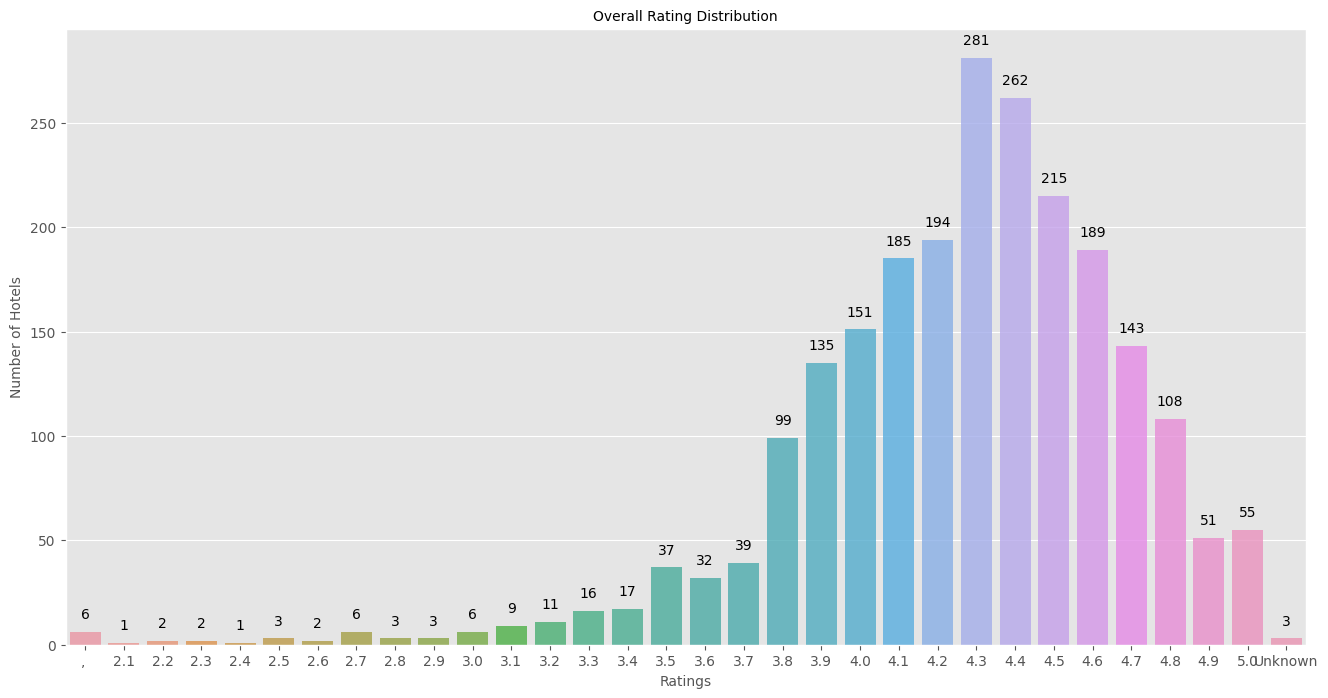

In [29]:
# Overall Rating Distribution
plt.figure(figsize=(16, 8))
ratdist = RatdistPlot(yelp_clean_df)
ratdist.plot(font_size=10,title="Overall Rating Distribution",text_height=5)

In [30]:
counts = yelp_clean_df['Reviews'].value_counts().sort_index()

In [31]:
counts

Reviews
,            6
2.1          1
2.2          2
2.3          2
2.4          1
2.5          3
2.6          2
2.7          6
2.8          3
2.9          3
3.0          6
3.1          9
3.2         11
3.3         16
3.4         17
3.5         37
3.6         32
3.7         39
3.8         99
3.9        135
4.0        151
4.1        185
4.2        194
4.3        281
4.4        262
4.5        215
4.6        189
4.7        143
4.8        108
4.9         51
5.0         55
Unknown      3
Name: count, dtype: int64

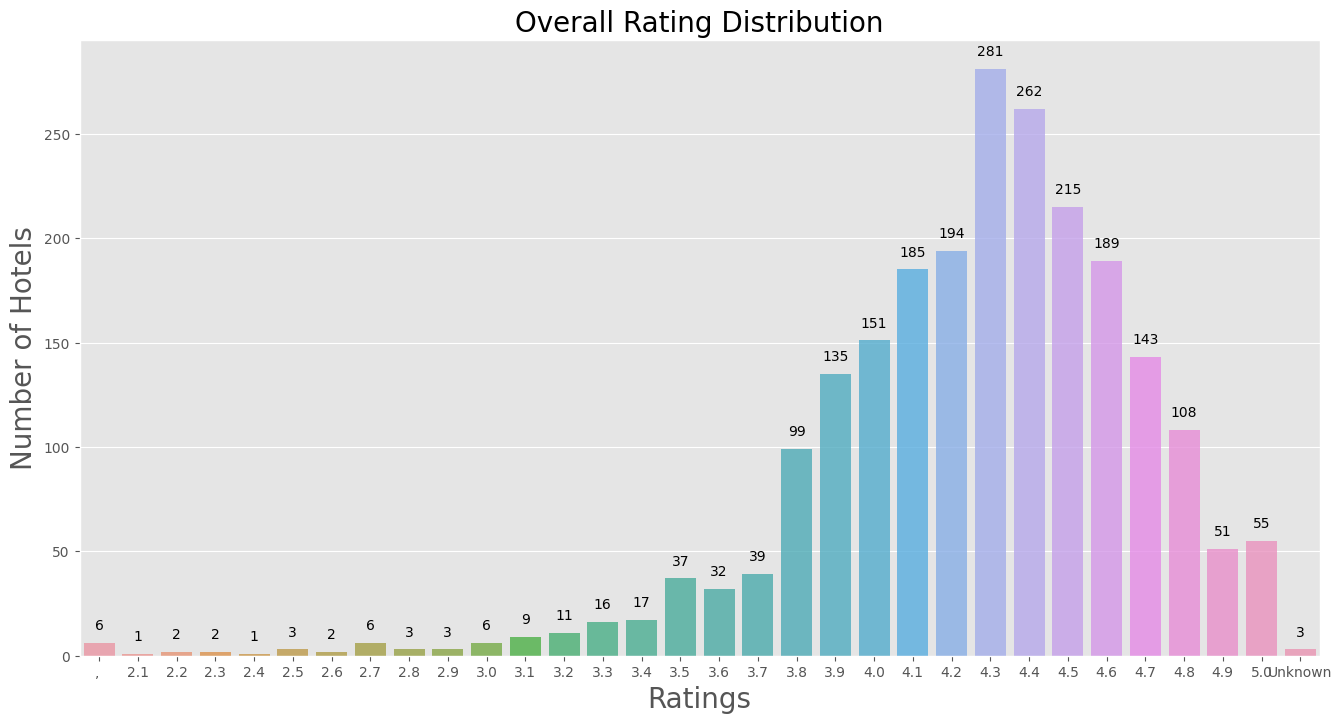

In [32]:
# Overall Rating Distribution
plt.figure(figsize=(16, 8))
ratdist = RatdistPlot(yelp_clean_df)
ratdist.plot(title="Overall Rating Distribution", font_size=20, text_height=5)


**Observation and comments:**

From the above plot:
- 1.The overall restaurants ratings distribution was **left skewed**, which means majority of restaurants have ratings between 3.0 to 5.0. 

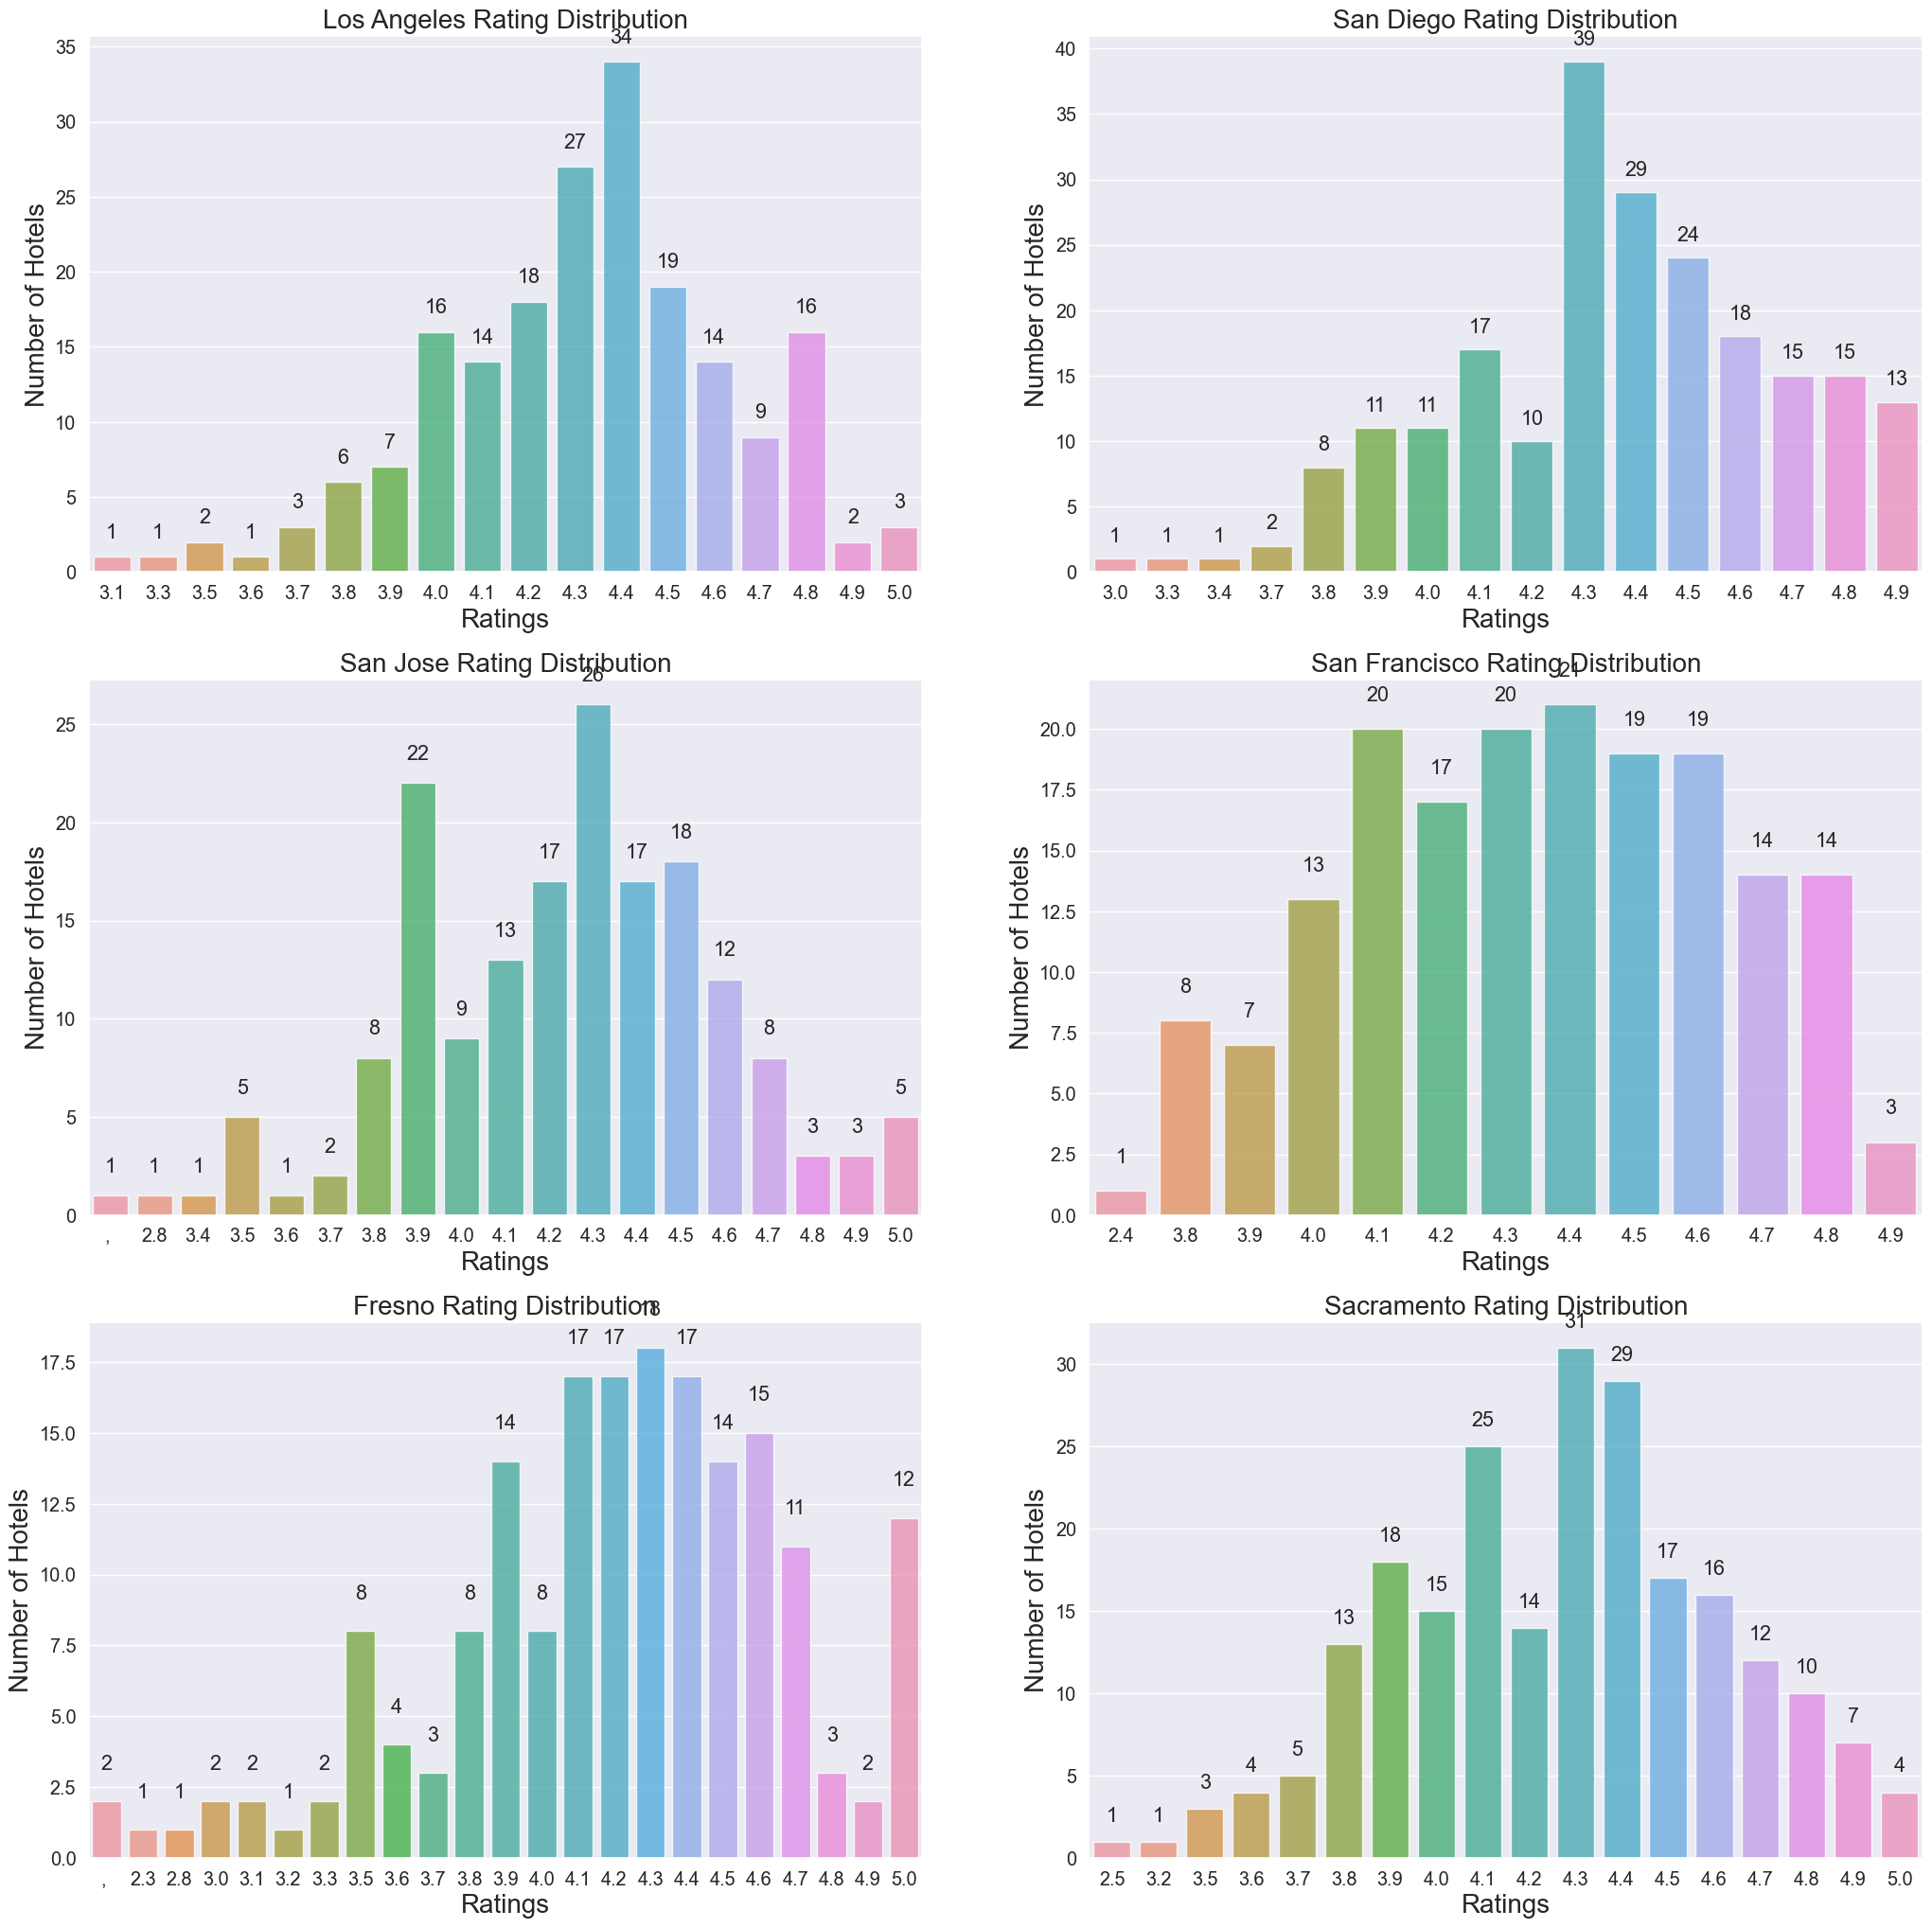

In [33]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set(font_scale=1.3)

# Create a figure and axes with specified number of rows and columns
fig, axes = plt.subplots(7, 2)
# Los Angeles
plt.subplot(321)
ratdist = RatdistPlot(yelp_df_la)
clean_yelp_df_la = ratdist.clean_each_city_df()
ratdist.plot(20, "Los Angeles Rating Distribution", text_height=1)

# San Diego
plt.subplot(322)
ratdist = RatdistPlot(yelp_df_sd)
clean_yelp_df_sd = ratdist.clean_each_city_df()
ratdist.plot(20, "San Diego Rating Distribution", text_height=1)

# San Jose
plt.subplot(323)
ratdist = RatdistPlot(yelp_df_sj)
clean_yelp_df_sj = ratdist.clean_each_city_df()
ratdist.plot(20, "San Jose Rating Distribution", text_height=1)

# San Francisco
plt.subplot(324)
ratdist = RatdistPlot(yelp_df_sf)
clean_yelp_df_sf = ratdist.clean_each_city_df()
ratdist.plot(20, "San Francisco Rating Distribution", text_height=1)

# Fresno
plt.subplot(325)
ratdist = RatdistPlot(yelp_df_fr)
clean_yelp_df_fr = ratdist.clean_each_city_df()
ratdist.plot( 20, "Fresno Rating Distribution", text_height=1)

# Sacramento
plt.subplot(326)
ratdist = RatdistPlot(yelp_df_sc)
clean_yelp_df_sc = ratdist.clean_each_city_df()
ratdist.plot(20, "Sacramento Rating Distribution", text_height=1)
# 
# plt.subplot(327)
# ratdist = RatdistPlot(yelp_df_ah)
# clean_yelp_df_ah = ratdist.clean_each_city_df()
# ratdist.plot(20, "Anahiem Rating Distribution")
# 
# plt.subplot(328)
# ratdist = RatdistPlot(yelp_df_bf)
# clean_yelp_df_bf = ratdist.clean_each_city_df()
# ratdist.plot(20, "Bakersfield Rating Distribution")
# 
# plt.subplot(329)
# ratdist = RatdistPlot(yelp_df_rs)
# clean_yelp_df_rs = ratdist.clean_each_city_df()
# ratdist.plot(20, "Riverside Rating Distribution")
# 
# plt.subplot(330)
# ratdist = RatdistPlot(yelp_df_ok)
# clean_yelp_df_ok = ratdist.clean_each_city_df()
# ratdist.plot(20, "Oakland Rating Distribution")
# 
# plt.subplot(331)
# ratdist = RatdistPlot(yelp_df_sa)
# clean_yelp_df_sa = ratdist.clean_each_city_df()
# ratdist.plot(20, "Santa Ana Rating Distribution")
# 
# plt.subplot(332)
# ratdist = RatdistPlot(yelp_df_lb)
# clean_yelp_df_lb = ratdist.clean_each_city_df()
# ratdist.plot(20, "Long Beach Rating Distribution")

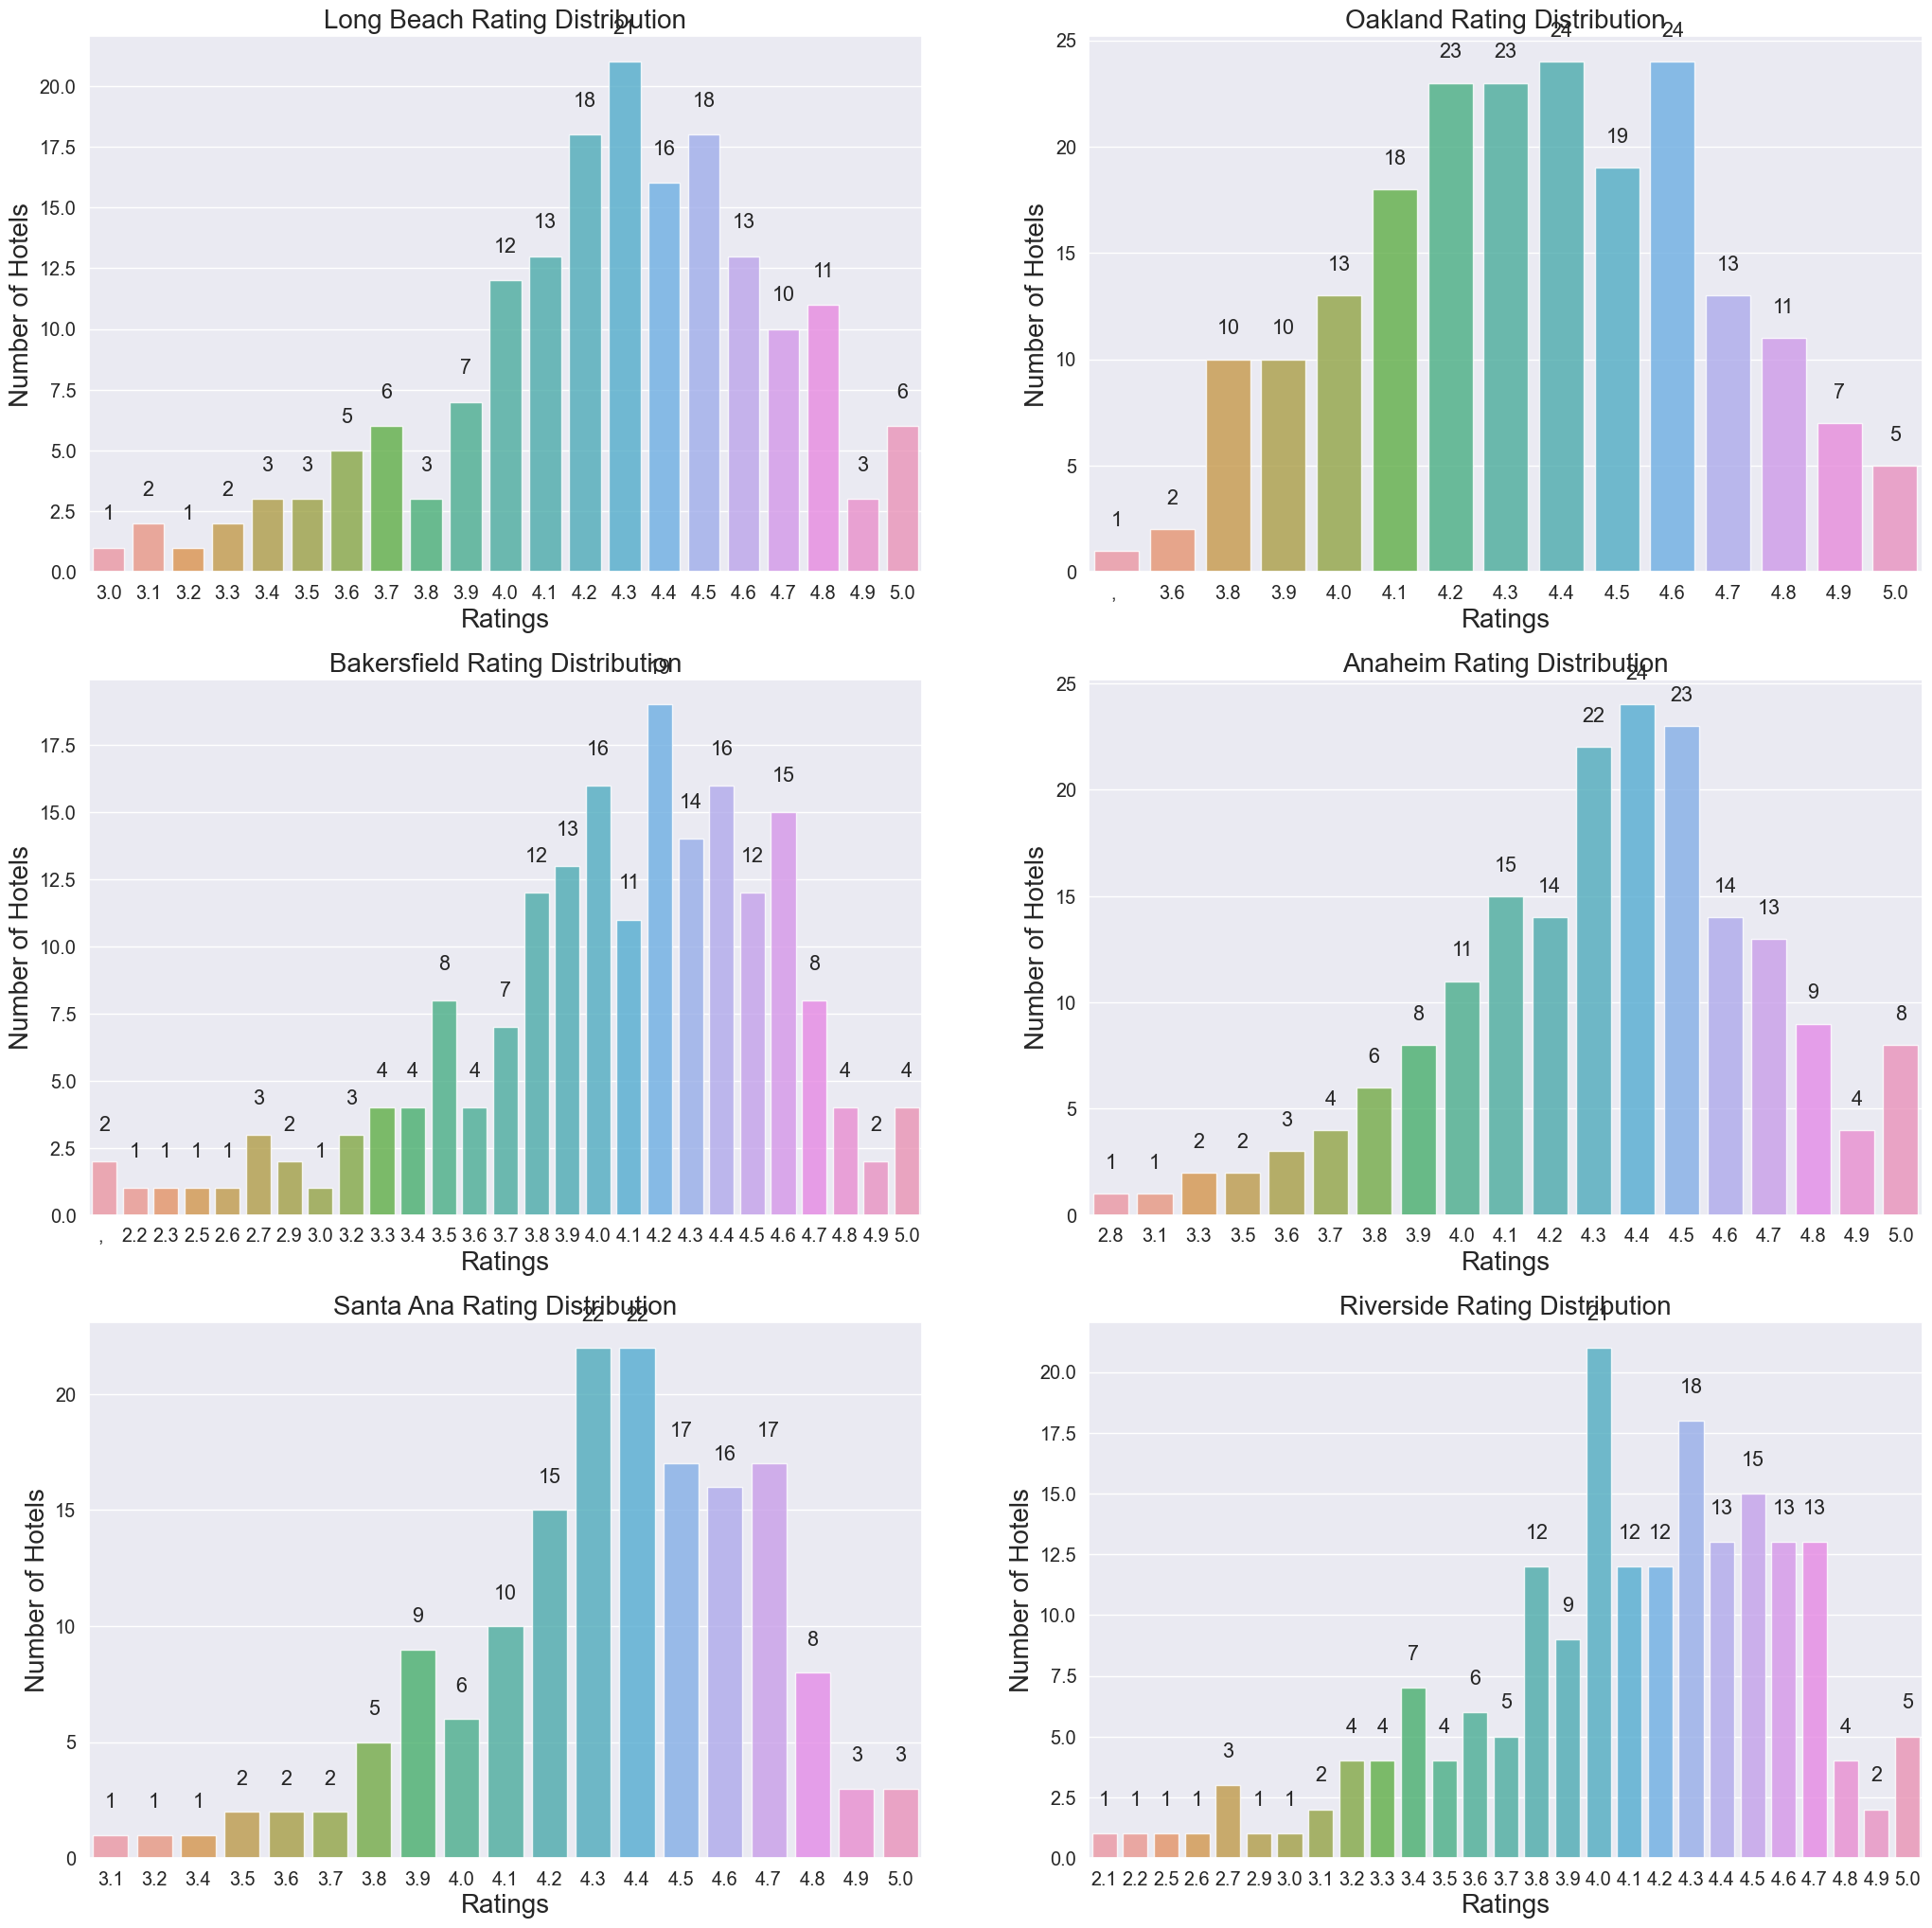

In [34]:
 # Long Beach
plt.subplot(321)
ratdist = RatdistPlot(yelp_df_lb)
clean_yelp_df_lb = ratdist.clean_each_city_df()
ratdist.plot(20, "Long Beach Rating Distribution", text_height=1)

# Oakland
plt.subplot(322)
ratdist = RatdistPlot(yelp_df_ok)
clean_yelp_df_ok = ratdist.clean_each_city_df()
ratdist.plot(20, "Oakland Rating Distribution", text_height=1)

# Bakersfield
plt.subplot(323)
ratdist = RatdistPlot(yelp_df_bf)
clean_yelp_df_bf = ratdist.clean_each_city_df()
ratdist.plot(20, "Bakersfield Rating Distribution", text_height=1)

# Anaheim
plt.subplot(324)
ratdist = RatdistPlot(yelp_df_ah)
clean_yelp_df_ah = ratdist.clean_each_city_df()
ratdist.plot(20, "Anaheim Rating Distribution", text_height=1)

# Santa Ana
plt.subplot(325)
ratdist = RatdistPlot(yelp_df_sa)
clean_yelp_df_sa = ratdist.clean_each_city_df()
ratdist.plot(20, "Santa Ana Rating Distribution", text_height=1)

# Riverside
plt.subplot(326)
ratdist = RatdistPlot(yelp_df_rs)
clean_yelp_df_rs = ratdist.clean_each_city_df()
ratdist.plot(20, "Riverside Rating Distribution", text_height=1)

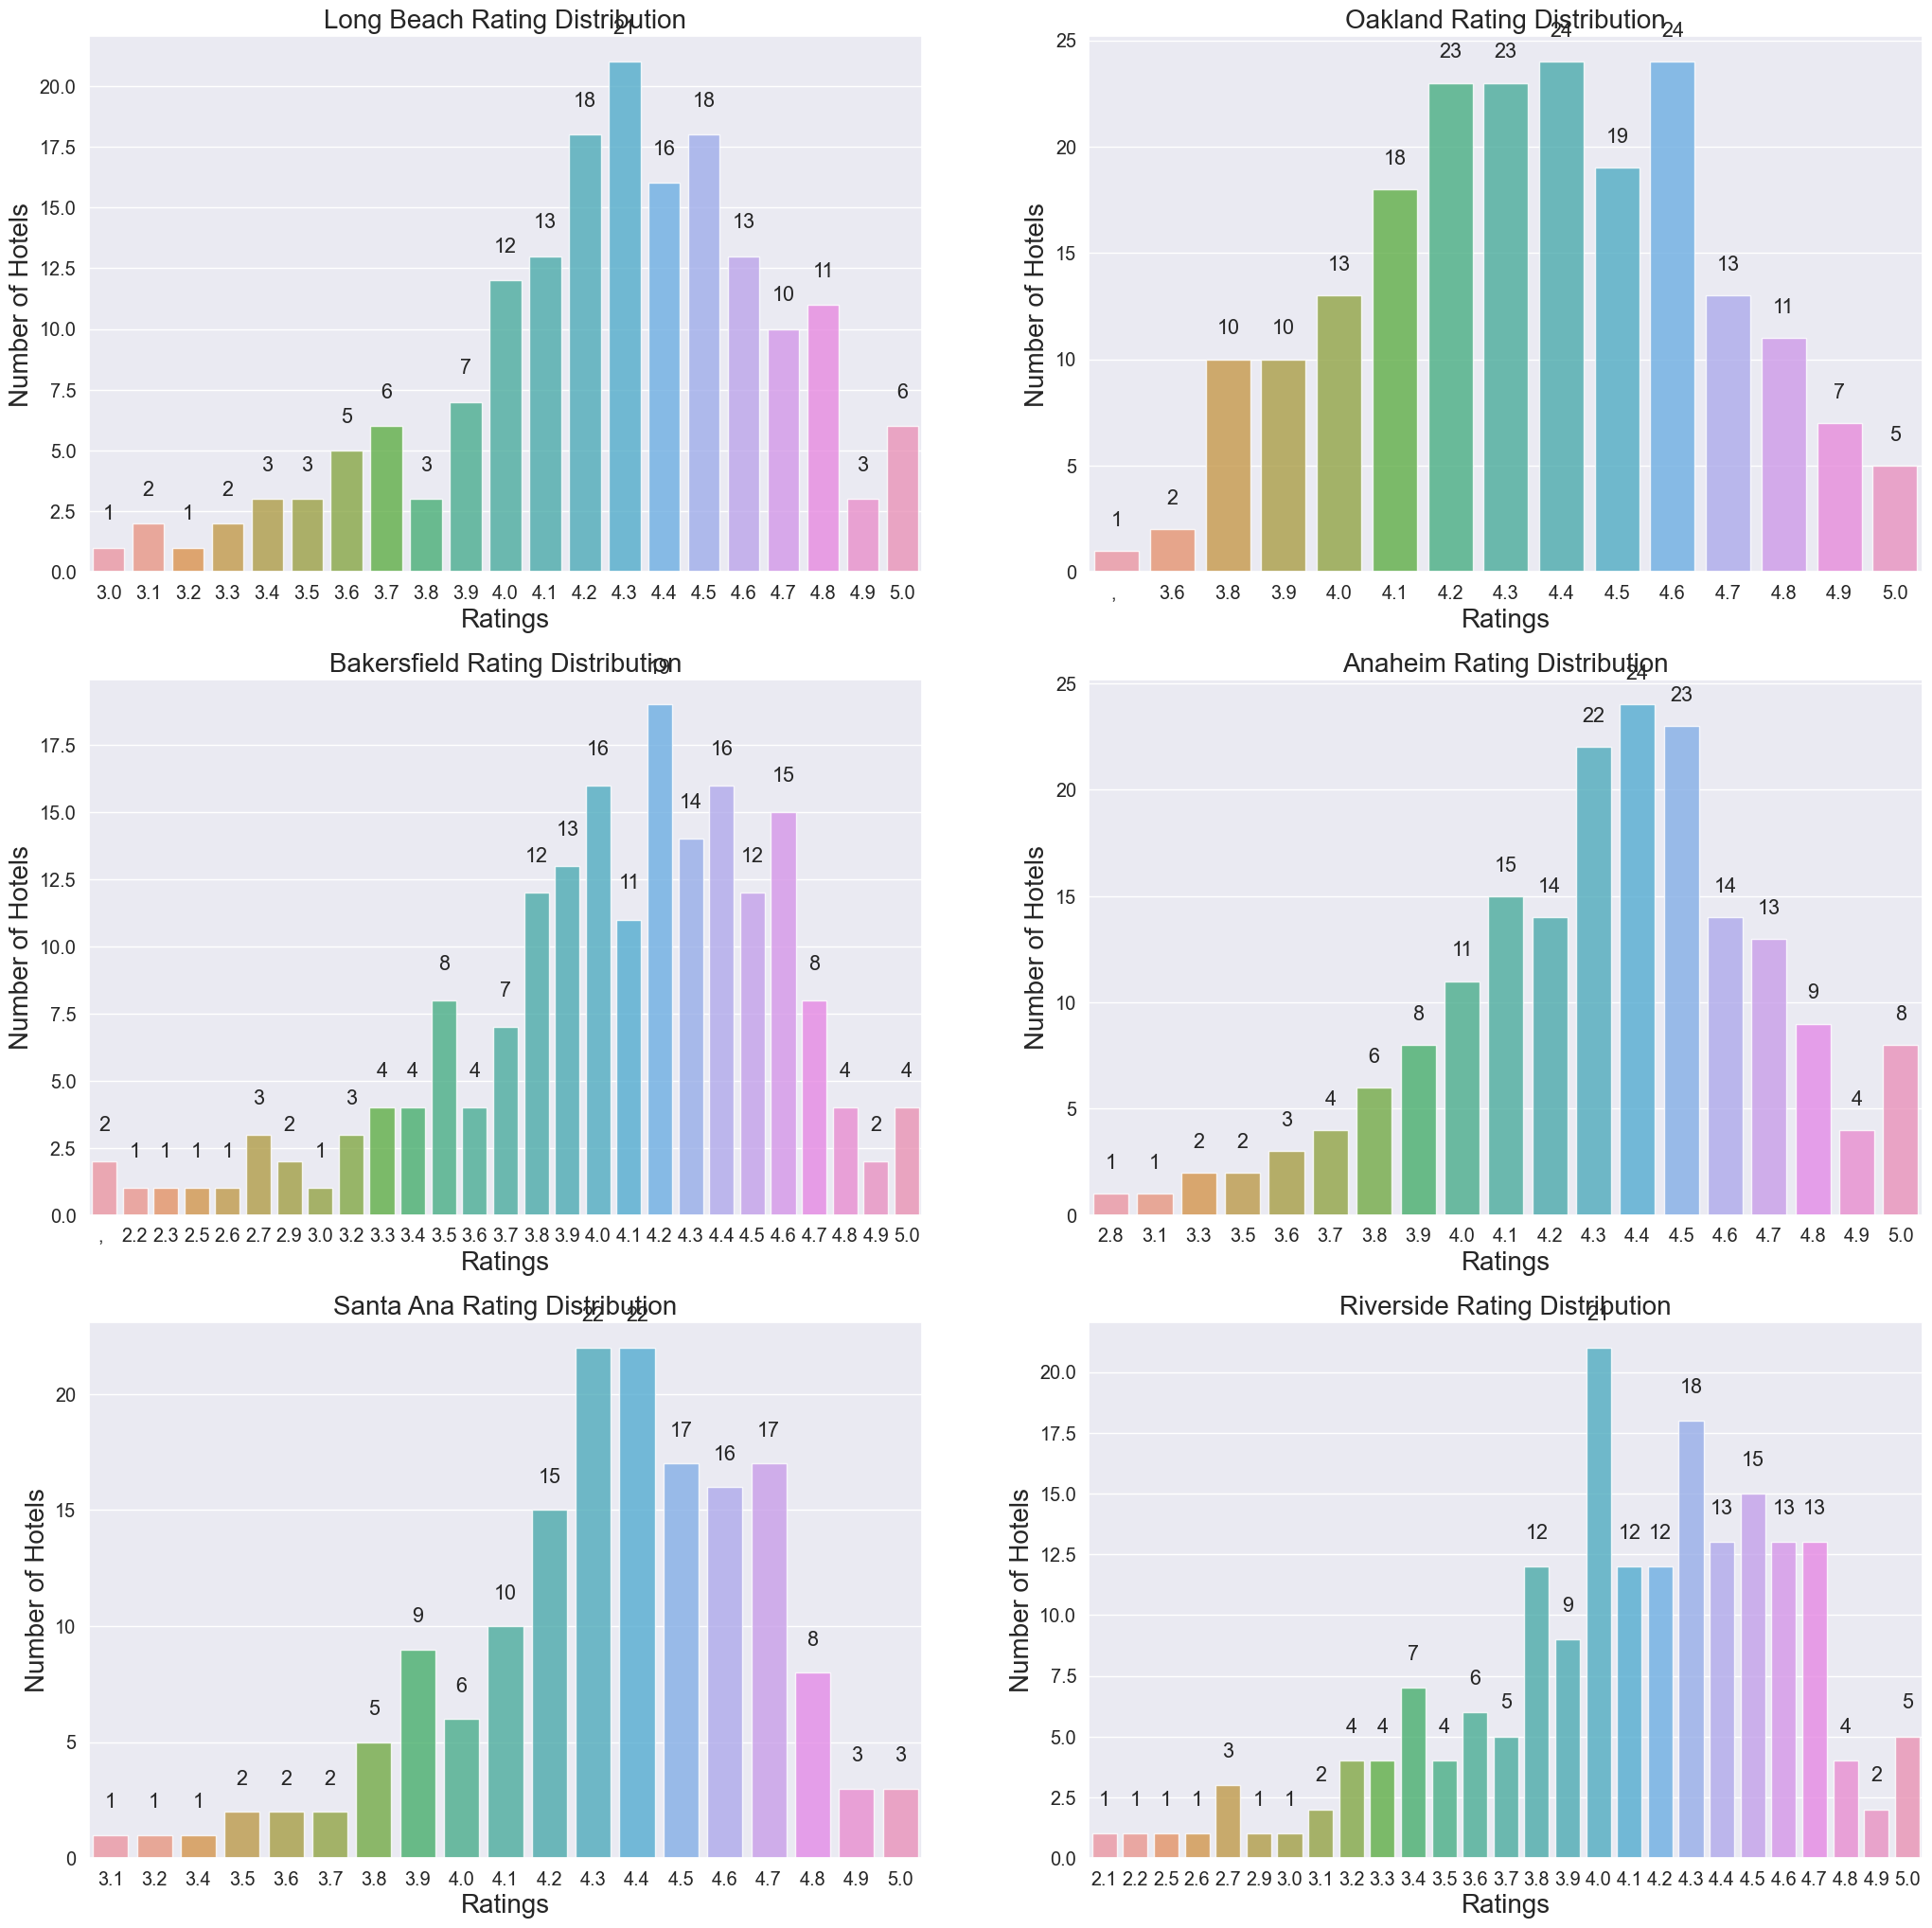

In [35]:
 # Long Beach
plt.subplot(321)
ratdist = RatdistPlot(yelp_df_lb)
clean_yelp_df_lb = ratdist.clean_each_city_df()
ratdist.plot(20, "Long Beach Rating Distribution", text_height=1)

# Oakland
plt.subplot(322)
ratdist = RatdistPlot(yelp_df_ok)
clean_yelp_df_ok = ratdist.clean_each_city_df()
ratdist.plot(20, "Oakland Rating Distribution", text_height=1)

# Bakersfield
plt.subplot(323)
ratdist = RatdistPlot(yelp_df_bf)
clean_yelp_df_bf = ratdist.clean_each_city_df()
ratdist.plot(20, "Bakersfield Rating Distribution", text_height=1)

# Anaheim
plt.subplot(324)
ratdist = RatdistPlot(yelp_df_ah)
clean_yelp_df_ah = ratdist.clean_each_city_df()
ratdist.plot(20, "Anaheim Rating Distribution", text_height=1)

# Santa Ana
plt.subplot(325)
ratdist = RatdistPlot(yelp_df_sa)
clean_yelp_df_sa = ratdist.clean_each_city_df()
ratdist.plot(20, "Santa Ana Rating Distribution", text_height=1)

# Riverside
plt.subplot(326)
ratdist = RatdistPlot(yelp_df_rs)
clean_yelp_df_rs = ratdist.clean_each_city_df()
ratdist.plot( 20, "Riverside Rating Distribution", text_height=1)

**Observation and comments:**

From the above plot:
- 1. Generally, Los Angeles, San Diego, San Francisco, Oakland have lowest portion of restaurants with rating below 4.0.
- 2. Fresno, Bakersfield, and Riverside have more frequency of low ratings restaurants compared with other cities. 
- 3. Majority of ratings are 3.5 to 4.5, we saw the geneous of Yelp reviewers on these restaurants.
- 4. Bakersfield and Riverside had relatively uniform rating distributions.

### Part II: Restaurants categorical analysis 

**<span style="color:blue">In this part, please refer `Codebase/category_plot.py` as helper plotting class.</span>**

In [36]:
import pandas as pd
import sys
import numpy as np
import os
import nltk
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from helper_fe import *

# Set up nltk stopwords
nltk.download('stopwords')

class CategoryPlot:
    
    def __init__(self, data, remove=string.punctuation):
        self.pattern = fr"[{remove}]"
        self.cat_frequency = {}
        self.data = data
        
    def _regex_split_join(self, item):
        """ Statistics on word frequency by attributes """
        try:
            to_be_join = re.split(self.pattern, item.strip())
        except:
            raise Exception(f'The item --{item} in the line above is not a string')
        for word in to_be_join:
            new_word = word.strip()
            if new_word in self.cat_frequency:
                self.cat_frequency[new_word] += 1
            else:
                self.cat_frequency[new_word] = 1
        return " ".join(to_be_join)
    
    def category_counting(self):
        """ Apply count frequency """
        self.data[['Category']].applymap(self._regex_split_join)  # Deep copy
        del self.cat_frequency['Unknown']  # Drop the "Unknown" case
        if '' in self.cat_frequency:
            del self.cat_frequency['']  # Drop the "" case
        return self.cat_frequency
    
    def cat_plot(self, num_top, font_size, title, overall=False, verbose=False):
        """ Frequency bar plot """
        catfre_df = pd.DataFrame(self.cat_frequency.items(), columns=['Word_Categories', 'Frequency'])
        # Sort the dataframe by word frequency 
        catfre_df = catfre_df.sort_values('Frequency', ascending=False)
        tot_cat = catfre_df.Word_Categories.value_counts()
        if verbose:
            print(f"There are {len(tot_cat)} different word categories to describe restaurants in Yelp")

        top_cat = catfre_df.Word_Categories.iloc[0:num_top]
        top_fre = catfre_df.Frequency.iloc[0:num_top]
        if overall:
            plt.figure(figsize=(20, 14))
        ax = sns.barplot(x=top_fre.values, y=top_cat.values, alpha=0.8)
        plt.title(title, fontsize=font_size)
        plt.ylabel('Word Categories', fontsize=font_size)
        plt.xlabel('Word Frequency', fontsize=font_size)

        # Adding the text labels
        for rect, label in zip(ax.patches, top_fre.values):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() + 5, height / 2 + rect.get_y(), label, ha='left')
            
    def make_word_cloud(self, text, max_word=30):
        """ Generate word cloud by word frequency """
        wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords.words("english"),
            scale=10,
            max_words=max_word,
            max_font_size=40)
        wordcloud = wordcloud.generate_from_frequencies(frequencies=self.cat_frequency)
        plt.figure(1, figsize=(15, 15))
        plt.axis('off')
        plt.imshow(wordcloud, interpolation="bilinear")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yvekaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


There are 230 different word categories to describe restaurants in Yelp


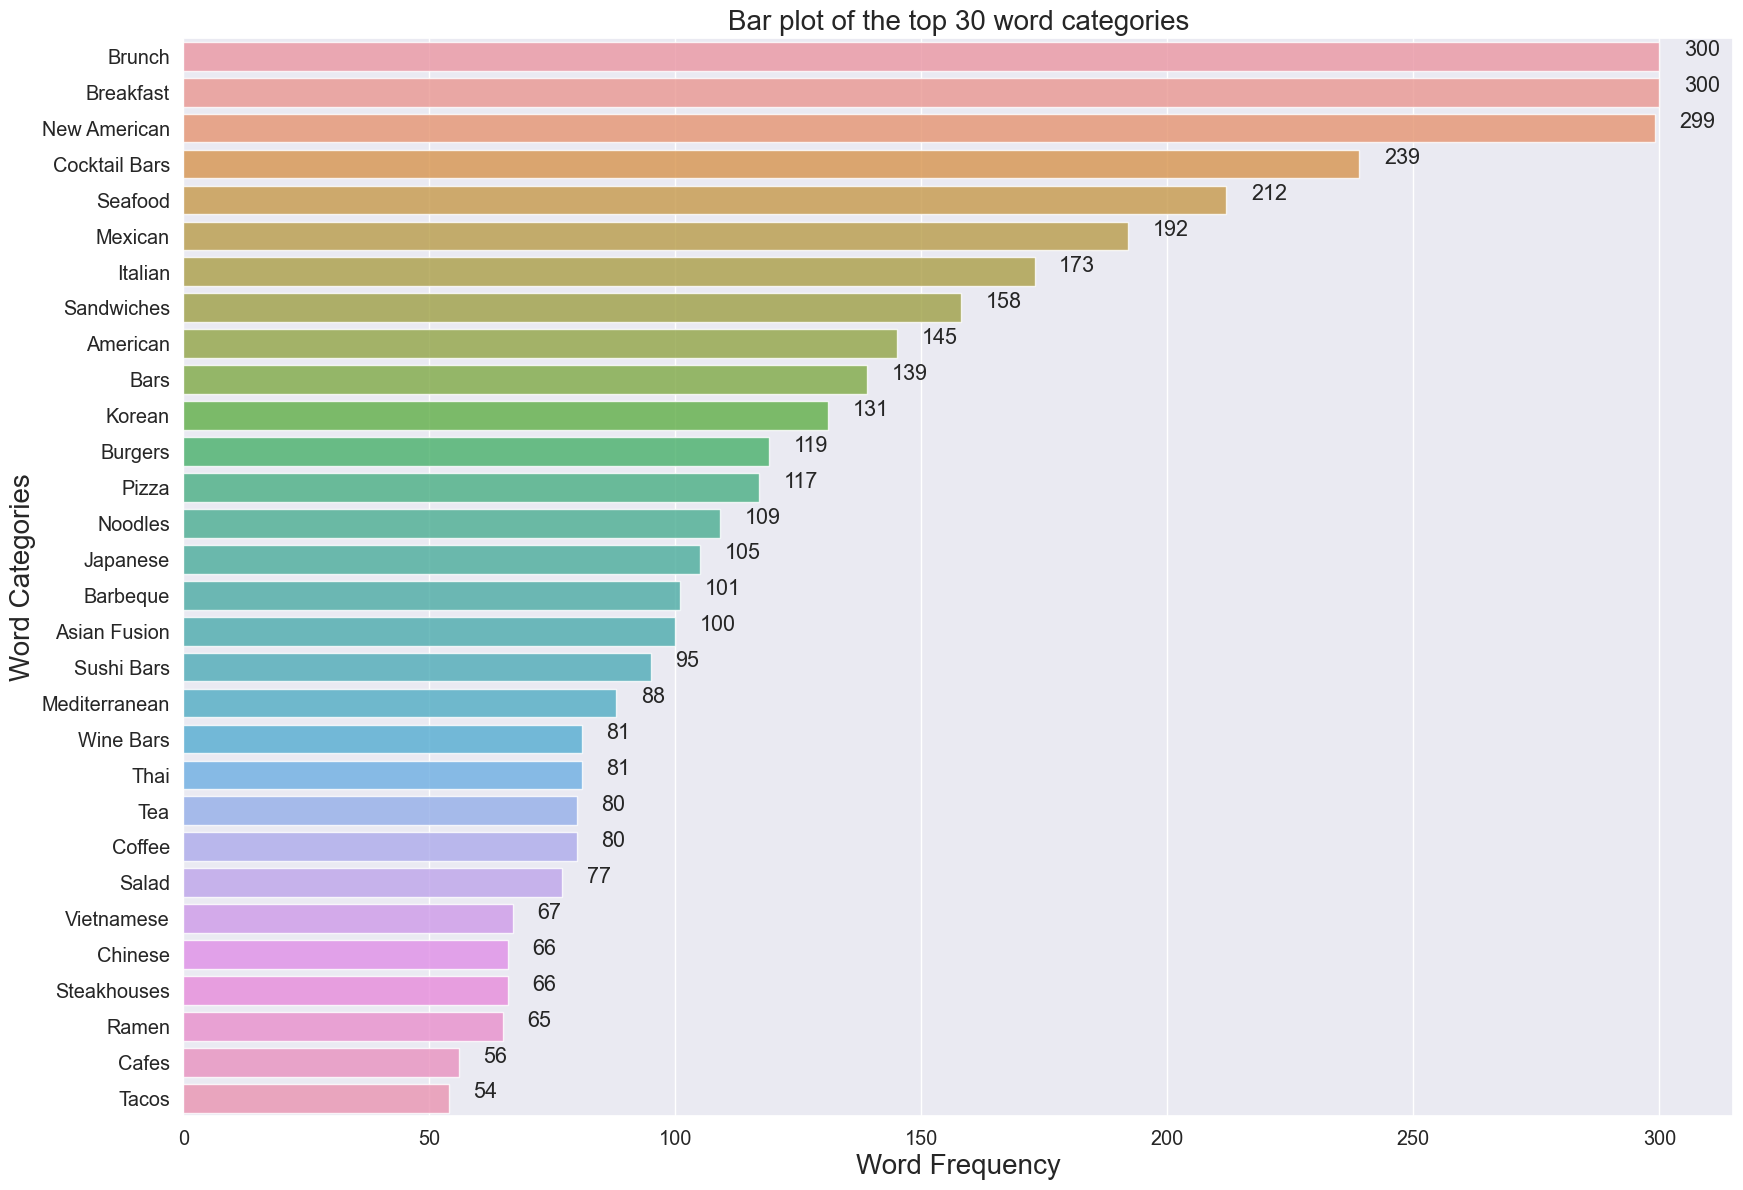

In [37]:
# apply to all dataset 
sns.set(rc={'figure.figsize':(25,25)})
sns.set(font_scale=1.3)
category_plot = CategoryPlot(yelp_clean_df)
category_plot.category_counting()
category_plot.cat_plot(30, 20, "Bar plot of the top 30 word categories", overall=True, verbose=True)

**Observation and comments:**

From the above plot:
- We conclude that "traditional American food" dominated the key words / category distributions.
- We also observe tremendous "Asian elements" in this board, such as "Chinese", "Vietnamese", "japanese", Korean", Asian fusion", and "Thai".
- We didn't observe too many European eleements from this board.

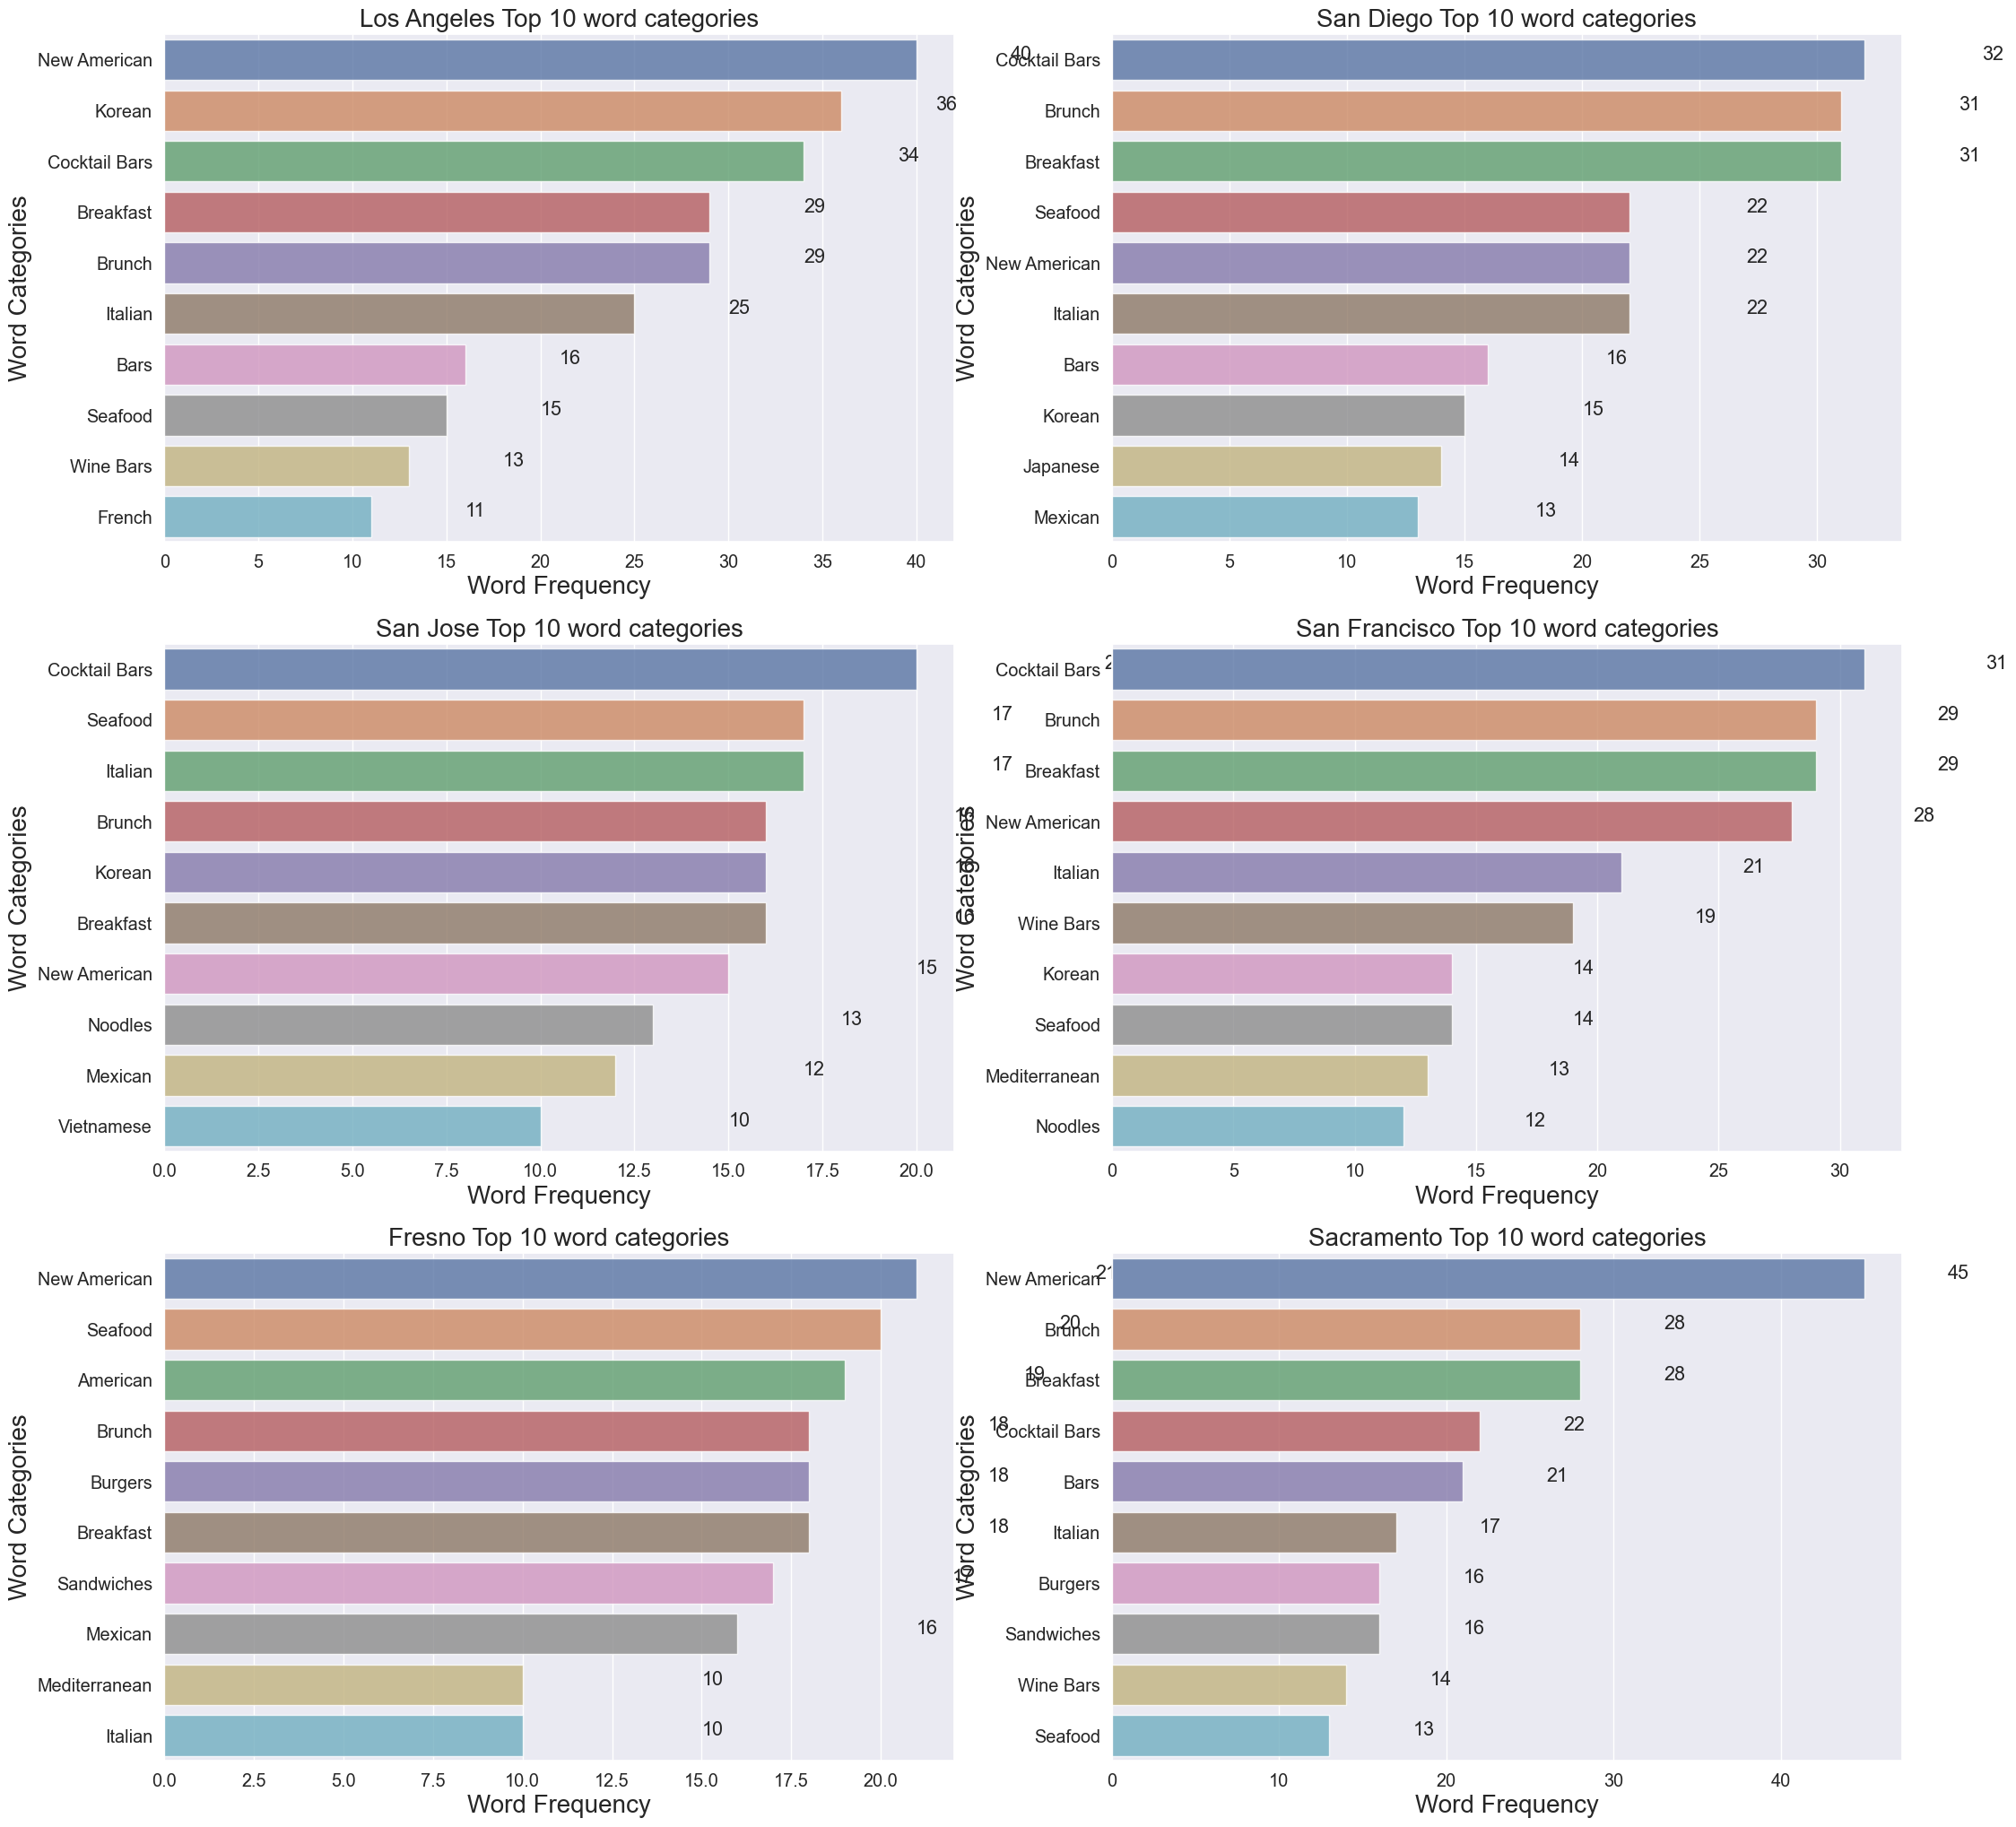

In [38]:
# 12 top 10 words plots
sns.set(font_scale=1.3)

# Los Angeles
plt.subplot(321)
category_plot = CategoryPlot(clean_yelp_df_la)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Los Angeles Top 10 word categories")

# San Diego
plt.subplot(322)
category_plot = CategoryPlot(clean_yelp_df_sd)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "San Diego Top 10 word categories")

# San Jose
plt.subplot(323)
category_plot = CategoryPlot(clean_yelp_df_sj)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "San Jose Top 10 word categories")

# San Francisco
plt.subplot(324)
category_plot = CategoryPlot(clean_yelp_df_sf)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "San Francisco Top 10 word categories")

# Fresno
plt.subplot(325)
category_plot = CategoryPlot(clean_yelp_df_fr)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Fresno Top 10 word categories")

# Sacramento
plt.subplot(326)
category_plot = CategoryPlot(clean_yelp_df_sc)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Sacramento Top 10 word categories")

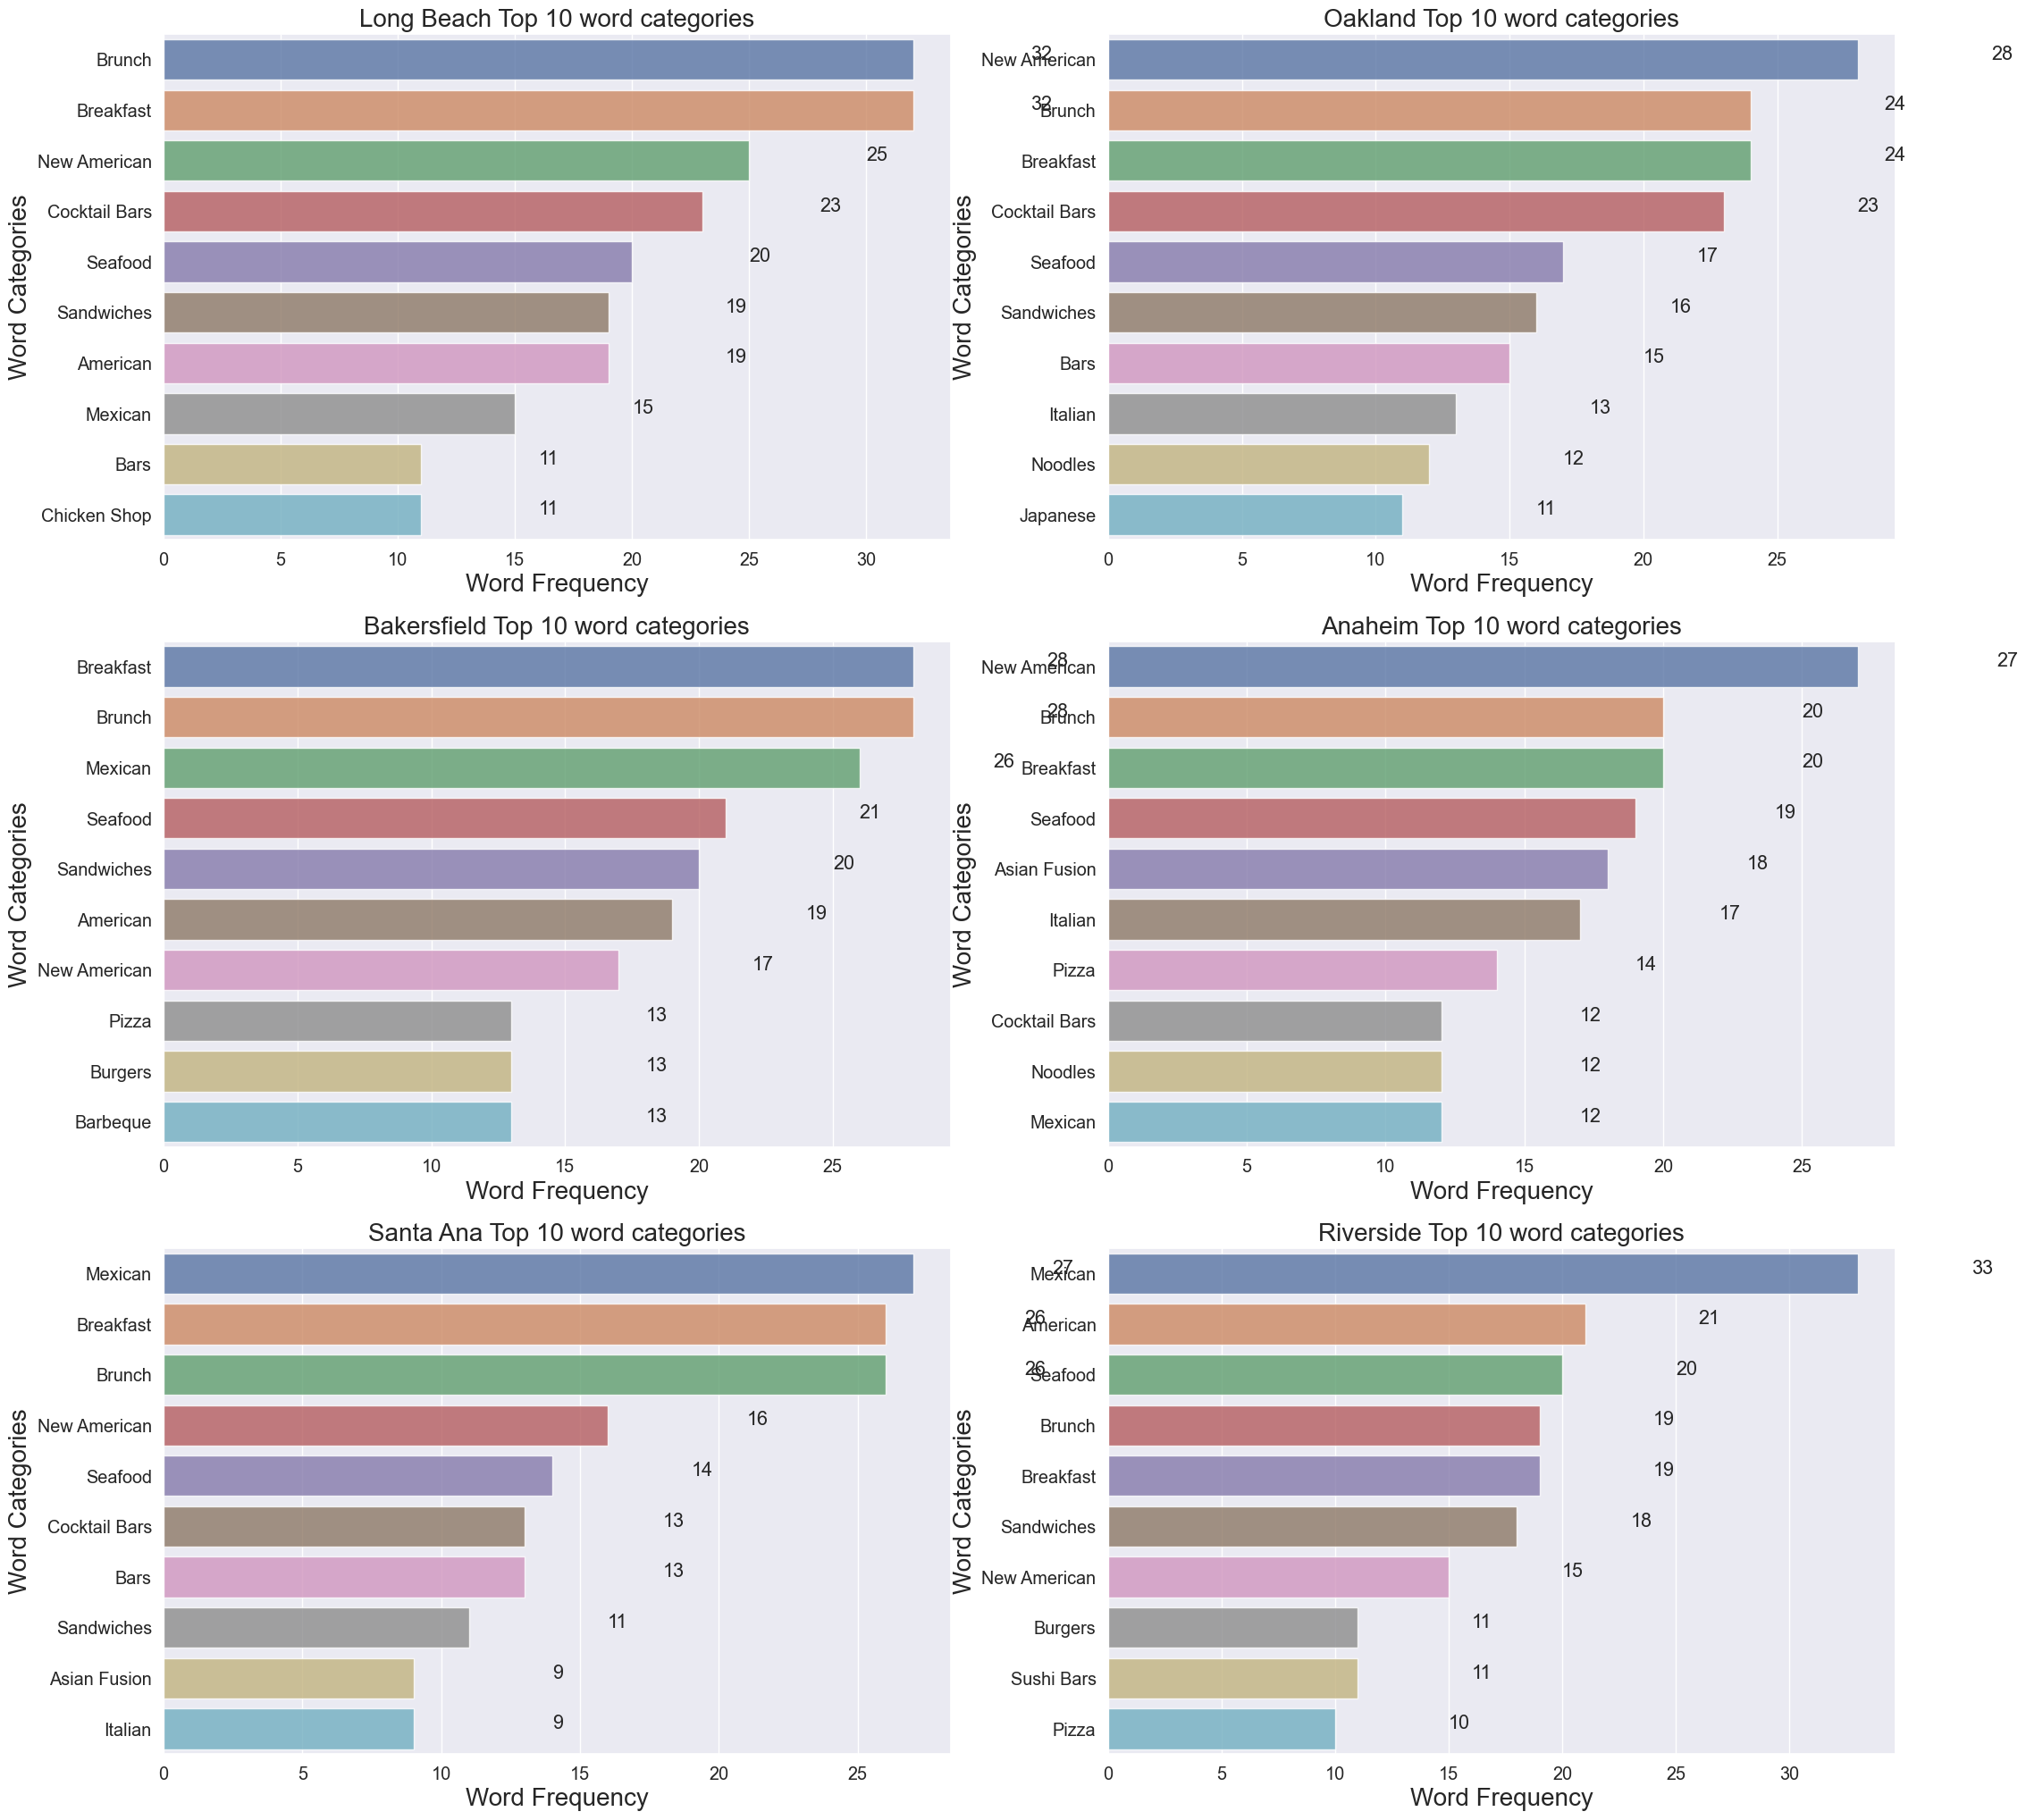

In [39]:
# Long Beach
plt.subplot(321)
category_plot = CategoryPlot(clean_yelp_df_lb)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Long Beach Top 10 word categories")

# Oakland
plt.subplot(322)
category_plot = CategoryPlot(clean_yelp_df_ok)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Oakland Top 10 word categories")

# Bakersfield
plt.subplot(323)
category_plot = CategoryPlot(clean_yelp_df_bf)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Bakersfield Top 10 word categories")

# Anaheim
plt.subplot(324)
category_plot = CategoryPlot(clean_yelp_df_ah)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Anaheim Top 10 word categories")

# Santa Ana
plt.subplot(325)
category_plot = CategoryPlot(clean_yelp_df_sa)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Santa Ana Top 10 word categories")

# Riverside
plt.subplot(326)
category_plot = CategoryPlot(clean_yelp_df_rs)
category_plot.category_counting()
category_plot.cat_plot(10, 20, "Riverside Top 10 word categories")

X**Observation and comments:**

From the above plot:
- 1. It's observed that in South California, "Mexican" element could even surpass the "American" element, and this could be explained by geo-graphical reasons. 
- 2. San Diego, famous for its sea views, we saw sea food ranked as second place, and this pattern could also be observed in other cities near Parcific Ocean, e.g. San Francisco.
- 3. We also observed that San Jose has most average key words frequency, their top three categories: American, Mexican, and Vietnamese compoents were approximately the same.

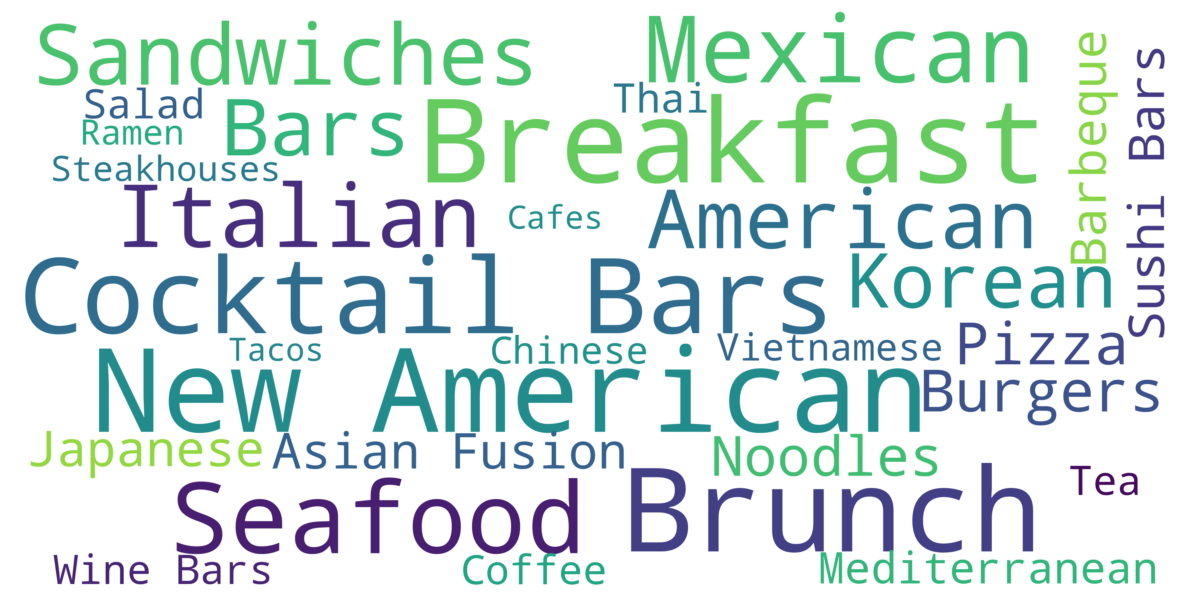

In [40]:
# word cloud plot on cancat dataset
category_plot = CategoryPlot(yelp_clean_df)
category_plot.category_counting()
cats_txt_list = yelp_clean_df['Category'].to_string()  # extract text
category_plot.make_word_cloud(cats_txt_list)

**Observations and explanation:**

From the plot above:
- This word cloud showed the majority caterogires on the board. The conclusion is the same as the previous Bar plot. we used a different graphical aesthtics to describe this observation.

### Part III: Restaurants operation hours analysis

**<span style="color:blue">In this part, please refer `Codebase/ophrs_plot.py` as helper plotting class.</span>**

In [41]:
def OpeningTime(time_str):
    if time_str == None:
        return None
    if time_str == 'Closed':
         return 'Closed'
    print("Actual string", time_str)
    components = str(time_str[0][0]).split()
    print("time_str:",components)
    print("Opening component:",type(components[0]))
    # Extract the hour and minute
    opening_hour_component = str(components[0]).split(':')
    if len(opening_hour_component) != 2:
        return "Closed"
    opening_hour, opening_minute = map(int, opening_hour_component)

    # Convert to 24-hour format if PM
    if 'PM' in components[1] and opening_hour != 12:
        opening_hour += 12
    opening_minute = opening_minute if opening_minute != 0 else '00'
    # Return the opening hour and minute in 24-hour format
    return str(opening_hour)+":"+str(opening_minute)

# Example usage:
time_str = [['3:00 PM - 9:30 PM']]
hour_24_format = OpeningTime(time_str)
print(hour_24_format)  # Output: 15


Actual string [['3:00 PM - 9:30 PM']]
time_str: ['3:00', 'PM', '-', '9:30', 'PM']
Opening component: <class 'str'>
15:00


In [42]:
def ClosingTime(time_str):
    if time_str == None or time_str=="Unknown":
        return 'No Info'
    if time_str == 'Closed':
        return 'Closed'

    # Split the time string into components
    try:
        print("Actual string", time_str)
        components = str(time_str[0][1]).split()
        print("time_str:",components)
        print("closing component:",components[0])
    except:
        components = str(time_str).split(" - ")[-1].split()[0:2]
        print(time_str, "################", components)
  
    # Extract the hour and minute
    closing_hour_component = str(components[0]).split(':')
    if len(closing_hour_component) != 2:
        return "Closed"
    closing_hour, closing_minute = map(int, closing_hour_component)

    # Convert to 24-hour format if PM
    if 'PM' in components[1] and closing_hour != 12:
        closing_hour += 12
    closing_minute = closing_minute if closing_minute != 0 else '00'
    # Return the closing hour and minute in 24-hour format
    return str(closing_hour)+":"+str(closing_minute)

# Example usage:
time_str = [['9:00 PM ','10:30 PM']]
time_str = [['7:00 AM ','11:00 AM']]
closing_hour_24 = ClosingTime(time_str)
print(closing_hour_24)  # Output: Closing hour: 22, Closing minute: 30

Actual string [['7:00 AM ', '11:00 AM']]
time_str: ['11:00', 'AM']
closing component: 11:00
11:00


In [43]:
# feature engineering on open hours
yelp_clean_df[['MonOpen', 'TueOpen', 'WedOpen', 'ThuOpen', 'FriOpen', 'SatOpen', 
               'SunOpen']] = yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                                            'Sat', 'Sun']].applymap(OpeningTime)  # 7 new features

yelp_clean_df[['MonClose', 'TueClose', 'WedClose', 'ThuClose', 'FriClose', 'SatClose', 
               'SunClose']] = yelp_clean_df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                                            'Sat', 'Sun']].applymap(ClosingTime)  # 7 new features
yelp_clean_df.head()

Actual string [['7:00 AM ', ' 11:00 AM']]
time_str: ['7:00', 'AM']
Opening component: <class 'str'>
Actual string [['4:00 PM ', ' 12:00 AM (Next day)']]
time_str: ['4:00', 'PM']
Opening component: <class 'str'>
Actual string [['3:00 PM ', ' 12:00 AM (Next day)']]
time_str: ['3:00', 'PM']
Opening component: <class 'str'>
Actual string [['5:00 PM ', ' 10:00 PM']]
time_str: ['5:00', 'PM']
Opening component: <class 'str'>
Actual string [['3:00 PM ', ' 1:00 AM (Next day)']]
time_str: ['3:00', 'PM']
Opening component: <class 'str'>
Actual string [['10:00 AM ', ' 9:00 PM']]
time_str: ['10:00', 'AM']
Opening component: <class 'str'>
Actual string [['10:00 AM ', ' 2:30 AM (Next day)']]
time_str: ['10:00', 'AM']
Opening component: <class 'str'>
Actual string [['12:00 PM ', ' 9:30 PM']]
time_str: ['12:00', 'PM']
Opening component: <class 'str'>
Actual string [['11:00 AM ', ' 3:00 PM']]
time_str: ['11:00', 'AM']
Opening component: <class 'str'>
Actual string [['8:00 AM ', ' 10:00 PM']]
time_str: [

time_str: ['2:00', 'PM']
closing component: 2:00
Actual string [['11:00 AM ', ' 11:00 PM']]
time_str: ['11:00', 'PM']
closing component: 11:00
Actual string [['11:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['11:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['11:30 AM ', ' 9:30 PM']]
time_str: ['9:30', 'PM']
closing component: 9:30
Actual string [['10:00 AM ', ' 2:00 AM (Next day)']]
time_str: ['2:00', 'AM', '(Next', 'day)']
closing component: 2:00
Actual string [['7:00 AM ', ' 3:30 PM']]
time_str: ['3:30', 'PM']
closing component: 3:30
Actual string [['11:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['10:30 AM ', ' 8:00 PM']]
time_str: ['8:00', 'PM']
closing component: 8:00
Actual string [['10:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['10:00 AM ', ' 8:00 PM']]
time_str: ['8:00', 'PM']
closing component: 8:00

time_str: ['9:15', 'PM']
closing component: 9:15
Actual string [['6:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['11:30 AM ', ' 9:00 PM']]
time_str: ['9:00', 'PM']
closing component: 9:00
Actual string [['11:00 AM ', ' 9:00 PM']]
time_str: ['9:00', 'PM']
closing component: 9:00
Actual string [['10:00 AM ', ' 11:00 PM']]
time_str: ['11:00', 'PM']
closing component: 11:00
Actual string [['11:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['10:30 AM ', ' 9:00 PM']]
time_str: ['9:00', 'PM']
closing component: 9:00
Actual string [['7:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['11:00 AM ', ' 9:00 PM']]
time_str: ['9:00', 'PM']
closing component: 9:00
Actual string [['11:00 AM ', ' 8:30 PM']]
time_str: ['8:30', 'PM']
closing component: 8:30
Actual string [['7:00 AM ', ' 2:00 PM']]
time_str: ['2:00', 'PM']
closing component: 2:00
Actual string [['11:00 AM ', ' 1

Actual string [['8:00 AM ', ' 8:00 PM']]
time_str: ['8:00', 'PM']
closing component: 8:00
Actual string [['12:00 PM ', ' 8:00 PM']]
time_str: ['8:00', 'PM']
closing component: 8:00
Actual string [['11:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['10:00 AM ', ' 9:00 PM']]
time_str: ['9:00', 'PM']
closing component: 9:00
Actual string [['10:00 AM ', ' 12:00 AM (Next day)']]
time_str: ['12:00', 'AM', '(Next', 'day)']
closing component: 12:00
Actual string [['11:00 AM ', ' 9:30 PM']]
time_str: ['9:30', 'PM']
closing component: 9:30
Actual string [['11:00 AM ', ' 6:00 PM']]
time_str: ['6:00', 'PM']
closing component: 6:00
Actual string [['11:00 AM ', ' 10:00 PM']]
time_str: ['10:00', 'PM']
closing component: 10:00
Actual string [['10:00 AM ', ' 8:00 PM']]
time_str: ['8:00', 'PM']
closing component: 8:00
Actual string [['5:00 PM ', ' 8:30 PM']]
time_str: ['8:30', 'PM']
closing component: 8:30
Actual string [['9:00 AM ', ' 6:00 PM']]
time_str: ['6:

index             Name                                      Address  \
0  Unknown   The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
1        1  King Chang - LA          3732 W 6th St Los Angeles, CA 90020   
2        2    Burnin' Shell     3916 Wilshire Blvd Los Angeles, CA 90010   
3        3          Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
4        4            Cento      4921 W Adams Blvd Los Angeles, CA 90016   

                                            Category    Price  \
0  New American, Breakfast & Brunch, Beer, Wine &...       $$   
1             Korean, Barbeque, Beer, Wine & Spirits  Unknown   
2                          Seafood, Korean, Barbeque      $$$   
3         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown   
4         Italian, Mediterranean, Tapas/Small Plates       $$   

            Rating Reviews                                 Mon  \
0  (3,509 reviews)     4.0             [[7:00 AM ,  11:00 AM]]   
1    (491 reviews)     4.8  [[4:00 PM ,  12:00 AM (Next day)]]   
2    (147 reviews)     4.6  [[3:00 PM ,  12:00 AM (Next day)]]   
3    (675 reviews)     4.0                              Closed   
4    (740 reviews)     4.5             [[5:00 PM ,  10:00 PM]]   

                                  Tue                                 Wed  \
0             [[7:00 AM ,  11:00 AM]]             [[7:00 AM ,  11:00 AM]]   
1  [[4:00 PM ,  12:00 AM (Next day)]]  [[4:00 PM ,  12:00 AM (Next day)]]   
2  [[3:00 PM ,  12:00 AM (Next day)]]  [[3:00 PM ,  12:00 AM (Next day)]]   
3              [[6:00 PM ,  9:00 PM]]              [[6:00 PM ,  9:00 PM]]   
4             [[5:00 PM ,  10:00 PM]]             [[5:00 PM ,  10:00 PM]]   

   ... SatOpen SunOpen MonClose TueClose WedClose ThuClose FriClose SatClose  \
0  ...    7:00    7:00    11:00    11:00    11:00    11:00    11:00    22:30   
1  ...   16:00   16:00    12:00    12:00    12:00     2:00     2:00     2:00   
2  ...   12:00   12:00    12:00    12:00    12:00    12:00    12:00    12:00   
3  ...   18:00   11:30   Closed    21:00    21:00    21:00    23:00    23:00   
4  ...   17:00   17:00    22:00    22:00    22:00    22:00    23:00    23:00   

  SunClose        ZIP  
0    22:30   CA 91602  
1    12:00   CA 90020  
2    22:00   CA 90010  
3    14:30   CA 90028  
4    22:00   CA 90016  

[5 rows x 29 columns]

### Part IV: Top 25 restaurants reviews distribution analysis based on cities 

We performed extensive analysis on Top 25 restaurants reviews.
- 1. Show top number of reviews by Archimedean spiral-liked plot.
- 2. Open-hour (i.e. start time) of the Top 25 restaurants
- 3. Relationships between price levels and ratings of the Top 25 restaurants.

In [44]:
# reviews_df = yelp_clean_df[yelp_clean_df['Reviews'] != "Unknown"]
# reviews_df['Reviews'] = reviews_df['Reviews'].apply(float)

# Convert 'Reviews' to numeric, coercing non-numeric values to NaN, then fill NaN with 0
yelp_clean_df['Reviews'] = pd.to_numeric(yelp_clean_df['Reviews'], errors='coerce').fillna(0)

# If there are any 'Unknown' values left, we set them to 0
yelp_clean_df.loc[yelp_clean_df['Reviews'] == 'Unknown', 'Reviews'] = 0

# Convert 'Reviews' to float now that we've handled non-numeric values
yelp_clean_df['Reviews'] = yelp_clean_df['Reviews'].astype(float)

yelp_clean_df.head()

index             Name                                      Address  \
0  Unknown   The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
1        1  King Chang - LA          3732 W 6th St Los Angeles, CA 90020   
2        2    Burnin' Shell     3916 Wilshire Blvd Los Angeles, CA 90010   
3        3          Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
4        4            Cento      4921 W Adams Blvd Los Angeles, CA 90016   

                                            Category    Price  \
0  New American, Breakfast & Brunch, Beer, Wine &...       $$   
1             Korean, Barbeque, Beer, Wine & Spirits  Unknown   
2                          Seafood, Korean, Barbeque      $$$   
3         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown   
4         Italian, Mediterranean, Tapas/Small Plates       $$   

            Rating  Reviews                                 Mon  \
0  (3,509 reviews)      4.0             [[7:00 AM ,  11:00 AM]]   
1    (491 reviews)      4.8  [[4:00 PM ,  12:00 AM (Next day)]]   
2    (147 reviews)      4.6  [[3:00 PM ,  12:00 AM (Next day)]]   
3    (675 reviews)      4.0                              Closed   
4    (740 reviews)      4.5             [[5:00 PM ,  10:00 PM]]   

                                  Tue                                 Wed  \
0             [[7:00 AM ,  11:00 AM]]             [[7:00 AM ,  11:00 AM]]   
1  [[4:00 PM ,  12:00 AM (Next day)]]  [[4:00 PM ,  12:00 AM (Next day)]]   
2  [[3:00 PM ,  12:00 AM (Next day)]]  [[3:00 PM ,  12:00 AM (Next day)]]   
3              [[6:00 PM ,  9:00 PM]]              [[6:00 PM ,  9:00 PM]]   
4             [[5:00 PM ,  10:00 PM]]             [[5:00 PM ,  10:00 PM]]   

   ... SatOpen SunOpen MonClose TueClose WedClose ThuClose FriClose SatClose  \
0  ...    7:00    7:00    11:00    11:00    11:00    11:00    11:00    22:30   
1  ...   16:00   16:00    12:00    12:00    12:00     2:00     2:00     2:00   
2  ...   12:00   12:00    12:00    12:00    12:00    12:00    12:00    12:00   
3  ...   18:00   11:30   Closed    21:00    21:00    21:00    23:00    23:00   
4  ...   17:00   17:00    22:00    22:00    22:00    22:00    23:00    23:00   

  SunClose        ZIP  
0    22:30   CA 91602  
1    12:00   CA 90020  
2    22:00   CA 90010  
3    14:30   CA 90028  
4    22:00   CA 90016  

[5 rows x 29 columns]

In [45]:
# Function to extract rating numbers
def extract_ratings(rating_str):
    try:
        # Find all digit sequences, join them, remove commas, and convert to int
        return int(''.join(re.findall(r'\d+', rating_str)).replace(',', ''))
    except (ValueError, AttributeError):
        # In case of any error, return 0
        return 0

# Apply the function to the 'Rating' column
yelp_clean_df['Rating'] = yelp_clean_df['Rating'].apply(extract_ratings)
yelp_clean_df.head()

index             Name                                      Address  \
0  Unknown   The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
1        1  King Chang - LA          3732 W 6th St Los Angeles, CA 90020   
2        2    Burnin' Shell     3916 Wilshire Blvd Los Angeles, CA 90010   
3        3          Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
4        4            Cento      4921 W Adams Blvd Los Angeles, CA 90016   

                                            Category    Price  Rating  \
0  New American, Breakfast & Brunch, Beer, Wine &...       $$    3509   
1             Korean, Barbeque, Beer, Wine & Spirits  Unknown     491   
2                          Seafood, Korean, Barbeque      $$$     147   
3         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown     675   
4         Italian, Mediterranean, Tapas/Small Plates       $$     740   

   Reviews                                 Mon  \
0      4.0             [[7:00 AM ,  11:00 AM]]   
1      4.8  [[4:00 PM ,  12:00 AM (Next day)]]   
2      4.6  [[3:00 PM ,  12:00 AM (Next day)]]   
3      4.0                              Closed   
4      4.5             [[5:00 PM ,  10:00 PM]]   

                                  Tue                                 Wed  \
0             [[7:00 AM ,  11:00 AM]]             [[7:00 AM ,  11:00 AM]]   
1  [[4:00 PM ,  12:00 AM (Next day)]]  [[4:00 PM ,  12:00 AM (Next day)]]   
2  [[3:00 PM ,  12:00 AM (Next day)]]  [[3:00 PM ,  12:00 AM (Next day)]]   
3              [[6:00 PM ,  9:00 PM]]              [[6:00 PM ,  9:00 PM]]   
4             [[5:00 PM ,  10:00 PM]]             [[5:00 PM ,  10:00 PM]]   

   ... SatOpen SunOpen MonClose TueClose WedClose ThuClose FriClose SatClose  \
0  ...    7:00    7:00    11:00    11:00    11:00    11:00    11:00    22:30   
1  ...   16:00   16:00    12:00    12:00    12:00     2:00     2:00     2:00   
2  ...   12:00   12:00    12:00    12:00    12:00    12:00    12:00    12:00   
3  ...   18:00   11:30   Closed    21:00    21:00    21:00    23:00    23:00   
4  ...   17:00   17:00    22:00    22:00    22:00    22:00    23:00    23:00   

  SunClose        ZIP  
0    22:30   CA 91602  
1    12:00   CA 90020  
2    22:00   CA 90010  
3    14:30   CA 90028  
4    22:00   CA 90016  

[5 rows x 29 columns]

In [46]:
# sort the df by reviews frequency 
reviews_df = yelp_clean_df.sort_values('Rating', ascending=False)

# extract data 
v = reviews_df['Name'].values.tolist()[0:25]
d = reviews_df['Rating'].values.tolist()[0:25]

# set up colors
color_series = ['#FAE927','#E9E416','#C9DA36','#9ECB3C','#6DBC49',
                '#37B44E','#3DBA78','#14ADCF','#209AC9','#1E91CA',
                '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#7D3990',
                '#A63F98','#C31C88','#D52178','#D5225B','#D02C2A',
                '#D44C2D','#F57A34','#FA8F2F','#D99D21','#CF7B25']

In [47]:
reviews_df.head()

index                             Name  \
715    762            Fog Harbor Fish House   
1911  2021  Craft By Smoke & Fire - Anaheim   
221    231           Snooze, an A.M. Eatery   
595    629                         San Tung   
485    512             Gen Korean BBQ House   

                                          Address  \
715      39 Pier Ste 202A San Francisco, CA 94133   
1911  195 W Center St Promenade Anaheim, CA 92805   
221            3940 Fifth Ave San Diego, CA 92103   
595        1031 Irving St San Francisco, CA 94122   
485    1628 Hostetter Rd Ste F San Jose, CA 95131   

                                         Category Price  Rating  Reviews  \
715             Seafood, Wine Bars, Cocktail Bars    $$   10236      4.3   
1911            Barbeque, Cocktail Bars, American    $$    9635      4.7   
221   Breakfast & Brunch, American, Cocktail Bars    $$    8512      4.4   
595               Chinese, Chicken Wings, Noodles    $$    8157      4.1   
485                              Korean, Barbeque    $$    7951      4.2   

                           Mon                       Tue  \
715    [[11:00 AM ,  9:00 PM]]   [[11:00 AM ,  9:00 PM]]   
1911  [[11:00 AM ,  10:00 PM]]  [[11:00 AM ,  10:00 PM]]   
221     [[6:30 AM ,  2:30 PM]]    [[6:30 AM ,  2:30 PM]]   
595    [[11:00 AM ,  3:00 PM]]                    Closed   
485   [[10:30 AM ,  11:00 PM]]  [[10:30 AM ,  11:00 PM]]   

                           Wed  ... SatOpen SunOpen MonClose TueClose  \
715    [[11:00 AM ,  9:00 PM]]  ...   11:00   11:00    21:00    21:00   
1911  [[11:00 AM ,  10:00 PM]]  ...   10:00   10:00    22:00    22:00   
221     [[6:30 AM ,  2:30 PM]]  ...    6:30    6:30    14:30    14:30   
595                     Closed  ...   11:00   11:00    15:00   Closed   
485   [[10:30 AM ,  11:00 PM]]  ...   10:30   10:30    23:00    23:00   

     WedClose ThuClose FriClose SatClose SunClose        ZIP  
715     21:00    21:00    21:00    21:00    21:00   CA 94133  
1911    22:00    22:00    12:00    12:00    22:00   CA 92805  
221     14:30    14:30    14:30    16:00    16:00   CA 92103  
595    Closed    15:00    15:00    15:00    15:00   CA 94122  
485     23:00    23:00    23:30    23:30    23:00   CA 95131  

[5 rows x 29 columns]

In [48]:
# pie plot instance 
pie1 = Pie(init_opts=opts.InitOpts(width='1000px', height='800px'))

# set colors
pie1.set_colors(color_series)

# import data 
pie1.add("", [list(z) for z in zip(v, d)],
        radius=["30%", "135%"],
        center=["50%", "65%"],
        rosetype="area")

# figure configurations
pie1.set_global_opts(title_opts=opts.TitleOpts(title='Top 25 most popular restaurants with most reviews'),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())

pie1.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,
                                               formatter="{b}:{c}", font_style="italic",
                                               font_weight="bold"))
pie1.render_notebook()

**Note: If you can't view the User-Interface (UI) image above (which happened several times during our own tests), please refer to the figure below, we saved this image as .png file:**
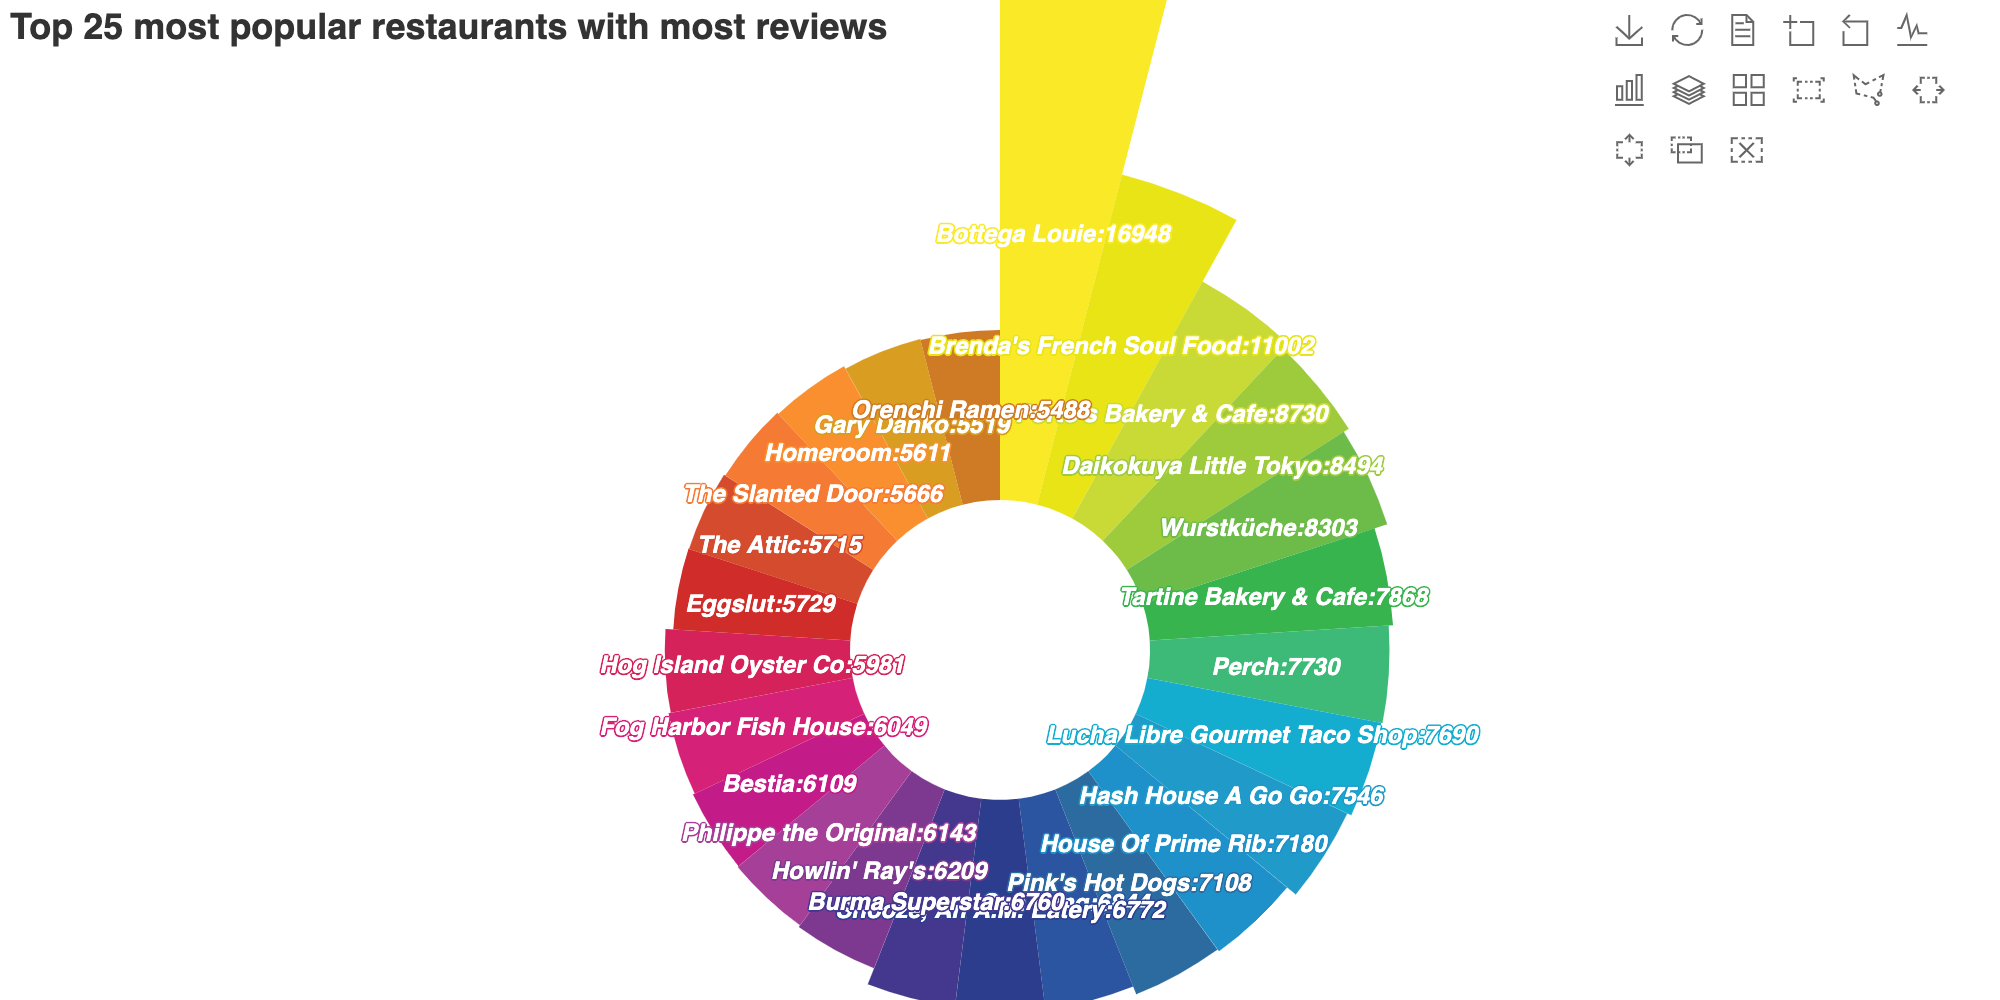

**Observations and Comments:**

- The plot above showed top 25 most reviewed restaurants by this Archimedean spiral-liked plot.

We would like perfrom some further analysis combined graphical methods on these top 25 restaurants, and we before with a list of these ideal restaurants:

In [49]:
# store the top 25 restaurants into a list
ideal_rets = ['Bottega Louie',
 "Brenda's French Soul Food",
 "Porto's Bakery & Cafe",
 'Daikokuya Little Tokyo',
 'Wurstküche',
 'Tartine Bakery & Cafe',
 'Perch',
 'Lucha Libre Gourmet Taco Shop',
 'Hash House A Go Go',
 'House Of Prime Rib',
 "Pink's Hot Dogs",
 'San Tung',
 'Snooze, An A.M. Eatery',
 'Burma Superstar',
 "Howlin' Ray's",
 'Philippe the Original',
 'Bestia',
 'Fog Harbor Fish House',
 'Hog Island Oyster Co',
 'Eggslut',
 'The Attic',
 'The Slanted Door',
 'Homeroom',
 'Gary Danko',
 'Orenchi Ramen']

In [50]:
def ideal_rests_filter(item, ideal_rets=ideal_rets):
    """ find sub dataframe of the top 25 restaurants
    Param:
        item: one item in dataframe
    Return:
        bool value based on if the item is in the ideal_rets list 
    """
    if item.strip() in ideal_rets:
        return True
    else:
        return False

**Observations and Comments:**

- 1.From the figure above, we could capture some operating strategies and insights of these excellent restaurants based on their open time, which may have close relationships with other features (e.g. category). 
- 2.For instance, `Porto's Bakery & Cafe` opens very early during weekdays and Saturday, but a little bit late on Sundays.
- 3.However, `Perch` opens too late to offer lunch on weekdays, while they could open earlier so that lunches could be offered during weekends.

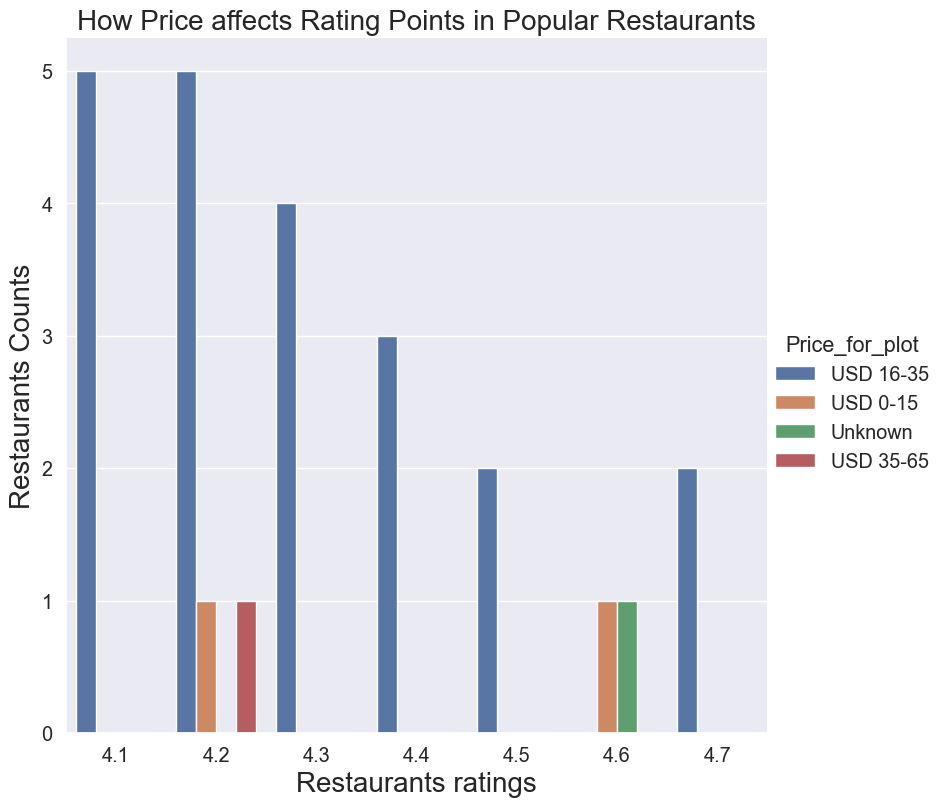

In [51]:
# Create a copy of the 'Price' column with the replacement
reviews_df['Price_for_plot'] = reviews_df['Price'].replace({'\$\$\$': 'USD 35-65', '\$\$': 'USD 16-35', '\$': 'USD 0-15'}, regex=True)

sns.set(rc={'figure.figsize':(25, 25)})
sns.set(font_scale=1.3)

# Use the modified 'Price_for_plot' column for the hue parameter
cat_plot = sns.catplot(x='Reviews', hue='Price_for_plot', kind='count', data=reviews_df[:25], height=8, aspect=1)

plt.ylabel('Restaurants Counts', fontsize=20)
plt.xlabel('Restaurants ratings', fontsize=20)
plt.title('How Price affects Rating Points in Popular Restaurants', fontsize=20)

# Substitute the placeholders back to the original dollar signs for legend labels
# for text in cat_plot._legend.texts:
#     text.set_text(text.get_text().replace('USDUSDUSD', '$$$').replace('USDUSD', '$$').replace('USD', '$'))

plt.show()

**Observations and Comments:**

From the plot above:
- 1. The overall ratings of these top 25 restaurants had a baseline of 3.5 stars, and majority of them have ratings greater than 4. This is not superise since popularity and ratings should have positive relations. 
- 2. Only one restaurants has price over 60 dollars, and majority of these popular restaurants were have price under 10 dollars and up to 30 dollars. 
- 3. The general property of these top reviewed restaurants: Popular and inexpensive.

### Part V: Restaurants geo-spatial analysis 

In [52]:
yelp_clean_df.head()

index             Name                                      Address  \
0  Unknown   The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
1        1  King Chang - LA          3732 W 6th St Los Angeles, CA 90020   
2        2    Burnin' Shell     3916 Wilshire Blvd Los Angeles, CA 90010   
3        3          Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
4        4            Cento      4921 W Adams Blvd Los Angeles, CA 90016   

                                            Category    Price  Rating  \
0  New American, Breakfast & Brunch, Beer, Wine &...       $$    3509   
1             Korean, Barbeque, Beer, Wine & Spirits  Unknown     491   
2                          Seafood, Korean, Barbeque      $$$     147   
3         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown     675   
4         Italian, Mediterranean, Tapas/Small Plates       $$     740   

   Reviews                                 Mon  \
0      4.0             [[7:00 AM ,  11:00 AM]]   
1      4.8  [[4:00 PM ,  12:00 AM (Next day)]]   
2      4.6  [[3:00 PM ,  12:00 AM (Next day)]]   
3      4.0                              Closed   
4      4.5             [[5:00 PM ,  10:00 PM]]   

                                  Tue                                 Wed  \
0             [[7:00 AM ,  11:00 AM]]             [[7:00 AM ,  11:00 AM]]   
1  [[4:00 PM ,  12:00 AM (Next day)]]  [[4:00 PM ,  12:00 AM (Next day)]]   
2  [[3:00 PM ,  12:00 AM (Next day)]]  [[3:00 PM ,  12:00 AM (Next day)]]   
3              [[6:00 PM ,  9:00 PM]]              [[6:00 PM ,  9:00 PM]]   
4             [[5:00 PM ,  10:00 PM]]             [[5:00 PM ,  10:00 PM]]   

   ... SatOpen SunOpen MonClose TueClose WedClose ThuClose FriClose SatClose  \
0  ...    7:00    7:00    11:00    11:00    11:00    11:00    11:00    22:30   
1  ...   16:00   16:00    12:00    12:00    12:00     2:00     2:00     2:00   
2  ...   12:00   12:00    12:00    12:00    12:00    12:00    12:00    12:00   
3  ...   18:00   11:30   Closed    21:00    21:00    21:00    23:00    23:00   
4  ...   17:00   17:00    22:00    22:00    22:00    22:00    23:00    23:00   

  SunClose        ZIP  
0    22:30   CA 91602  
1    12:00   CA 90020  
2    22:00   CA 90010  
3    14:30   CA 90028  
4    22:00   CA 90016  

[5 rows x 29 columns]

In [53]:
# tranferring data into appropriate formats
def intRating(item):
    """ encode all Ratings from mixed type to int
    """
    if item == 'Unknown':
        return 0
    return float(item)

# Apply the conversion function to the 'Rating' column
yelp_clean_df['ReviewRatings'] = yelp_clean_df['Reviews'].apply(intRating)

# Strip 'CA ' prefix from 'ZIP' column
yelp_clean_df['ZIP'] = yelp_clean_df['ZIP'].replace({'CA ': ''}, regex=True)

# Calculate mean rating points by ZIP, keeping ZIP as a column and not an index
ZIP_data = yelp_clean_df.groupby('ZIP', as_index=False)['ReviewRatings'].mean()

# Drop the row where ZIP is 'Unknown'
ZIP_data = ZIP_data[ZIP_data['ZIP'] != 'Unknown'].astype(str)

# Convert 'RatingPoints' column to string
ZIP_data['ReviewRatings'] = ZIP_data['ReviewRatings'] #.astype(str)

# If you need to reset the index so it starts from 0, do the following:
ZIP_data.reset_index(drop=True, inplace=True)

# Ensure there are no leading/trailing whitespaces in the 'ZIP' columns
ZIP_data['ZIP'] = ZIP_data['ZIP'].str.strip()

print(ZIP_data.head())
print(ZIP_data.columns)

     ZIP      ReviewRatings
0  90004  4.333333333333333
1  90005                4.4
2  90006                4.4
3  90007                4.8
4  90010  4.642857142857143
Index(['ZIP', 'ReviewRatings'], dtype='object')


In [54]:
# read dictionary from online resource
# https://data.world/niccolley/us-zipcode-to-county-state
# add feature: fips 
fips_data = pd.read_csv('../Database/resource_csv/fipsDict.csv', dtype={'ZIP':str,'STCOUNTYFP':str})
fips_data['ZIP'] = fips_data['ZIP'].str.strip()
print(fips_data[fips_data["ZIP"]=="90004"].head())
scratch = ZIP_data.merge(fips_data, how='left', on='ZIP')
scratch = scratch.dropna()
scratch.head()

        ZIP STCOUNTYFP         CITY STATE          COUNTYNAME CLASSFP
3722  90004      06037  Los angeles    CA  Los Angeles County      H1


ZIP      ReviewRatings STCOUNTYFP         CITY STATE          COUNTYNAME  \
0  90004  4.333333333333333      06037  Los angeles    CA  Los Angeles County   
1  90005                4.4      06037  Los angeles    CA  Los Angeles County   
2  90006                4.4      06037  Los angeles    CA  Los Angeles County   
3  90007                4.8      06037  Los angeles    CA  Los Angeles County   
4  90010  4.642857142857143      06037  Los angeles    CA  Los Angeles County   

  CLASSFP  
0      H1  
1      H1  
2      H1  
3      H1  
4      H1

In [55]:
# get geojson (plot settings)
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
countyFeatures = counties['features']
needCountieFeatures= []
for sample in countyFeatures:
    if sample['properties']['STATE'] == '06':
        needCountieFeatures.append(sample)
plot_counties = {}
plot_counties['type'] = counties['type'] 
plot_counties['features'] = needCountieFeatures
print(plot_counties)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'GEO_ID': '0500000US06005', 'STATE': '06', 'COUNTY': '005', 'NAME': 'Amador', 'LSAD': 'County', 'CENSUSAREA': 594.583}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-120.995497, 38.225405], [-121.027084, 38.300252], [-121.027507, 38.508292], [-120.813554, 38.562193], [-120.627604, 38.503143], [-120.510596, 38.511467], [-120.301721, 38.549109], [-120.098322, 38.709029], [-120.072392, 38.702767], [-120.072484, 38.509869], [-120.380707, 38.461042], [-120.423215, 38.473322], [-120.893792, 38.221277], [-120.995497, 38.225405]]]}, 'id': '06005'}, {'type': 'Feature', 'properties': {'GEO_ID': '0500000US06021', 'STATE': '06', 'COUNTY': '021', 'NAME': 'Glenn', 'LSAD': 'County', 'CENSUSAREA': 1313.947}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-122.937654, 39.798156], [-122.046471, 39.797648], [-121.950951, 39.715004], [-121.994021, 39.533926], [-121.856532, 39.536904], [-121.890013, 39.383864], [-122.1361

In [71]:
scratch.head()
print(scratch.dtypes)

# Convert 'ReviewRatings' from object to float and round to two decimal places
scratch['ReviewRatings'] = scratch['ReviewRatings'].astype(float).round(2)

print(scratch.dtypes)

ZIP              object
ReviewRatings    object
STCOUNTYFP       object
CITY             object
STATE            object
COUNTYNAME       object
CLASSFP          object
dtype: object
ZIP               object
ReviewRatings    float64
STCOUNTYFP        object
CITY              object
STATE             object
COUNTYNAME        object
CLASSFP           object
dtype: object


In [72]:
# Generate the choropleth map with a continuous color scale
fig = px.choropleth(
    scratch,
    geojson=plot_counties,  # make sure this variable is defined and contains the correct GeoJSON data
    locations='STCOUNTYFP',
    color='ReviewRatings',
    color_continuous_scale="Viridis",
    range_color=(0, 5),  # adjust as necessary to match your data's range
    scope="usa"
)

# Update layout to adjust margins if needed
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

# Show the figure
fig.show()

**Note: If you can't view the User-Interface (UI) image above (which happened several times during our own tests), please refer to the figure below, we saved this image as .png file:**
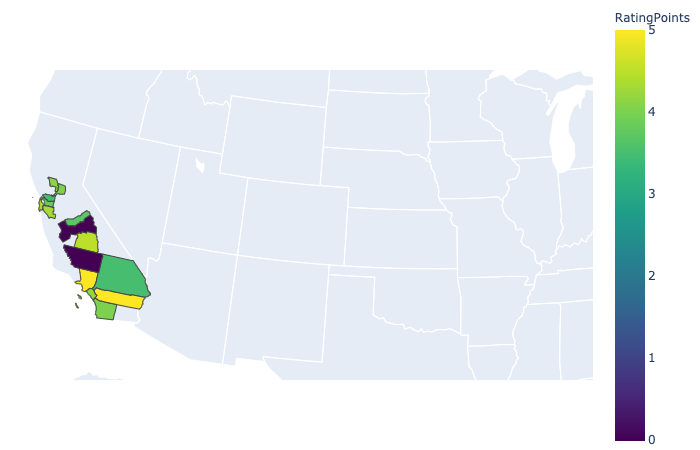

**Observations and Comments:**

From the above geo-spatial analysis:
- 1. There are more than 12 fips codes in this geo-spatial plot, each fips code represents a colored block, but necessarily a city. Thus, we saw two large fips are (Kern County and Fresno County) coding with approximately 0-1 ratings, and this could be explained by limited data cases available in these area, or the reviews were limited in these fips area. 
- 2. It's obvious that south California area (especially Los Angeles and Riverside) has better restaurants ratings than other cities. Other area (except the two area mentioned above) show moderate average ratings. 
- 3. This geo-spatial analysis could be extended to the whole U.S. map, given enough dataset. 

## Section V: Restaurants rating prediction 

**<span style="color:blue">In this part, please refer `Codebase/helper_ml.py` as helper machine learning codes.</span>**

In this part, we try to find that if we can use some features of the restaurants to predict its rating. The features we considered that would have impact on rating are:

- Price: The average cost of customers in a restaurant.
- Delivery: Whether the restaurant provides delivery service or not.
- Wi-Fi: Whether the restaurant provide Wi-Fi or not, and the service is free or paid.
- Takes_Reservations: Whether the restaurant allow reservations.
- Vegetarian_Options: Whether the restaurant provides vegetarian options
- Accepts_Credit_Cards, Accepts_Apple_Pay, Accepts_Google_Pay: which kind of pay methods is accepted
- Take_out: Whether take-out allowed in the restaurant.
- street, lot, garage, valet: Place for parking.

In [ ]:
consider_feature = ['Price', 'Delivery', 'Wi_Fi', 'Takes_Reservations',
                    'Vegetarian_Options', 'Accepts_Credit_Cards', 'Accepts_Apple_Pay',
                    'Accepts_Google_Pay','Take_out', 'street', 'lot', 'garage', 'valet',]
yelp_rate_df = yelp_clean_df[["Rating"] + consider_feature]
print(f'The data frame for predictions: {yelp_rate_df.shape}')
yelp_rate_df.sample(1)

In [ ]:
# drop the missing values of the response variable "Rating"
yelp_rate_df = yelp_rate_df[yelp_rate_df["Rating"] != "Unknown"].reset_index(drop=True)
yelp_rate_df["Rating"] = yelp_rate_df["Rating"].astype(str).astype(float)

# show how much missing values each feature has
total_num = yelp_rate_df.shape[0]
for col in yelp_rate_df.columns[1:]:
    value_count = yelp_rate_df[col].value_counts()
    miss_num = value_count["Unknown"] if "Unknown" in value_count.index else 0
    print(f"{col}:".ljust(20), f"{miss_num} missing of total {total_num} records".rjust(45))

From above, we notice that, except "Vegetarian_Options" feature, other features all have a acceptable number of missing values, and we decide to deal with the missing data by creating missingness indicator variables.

In [ ]:
yelp_rate_df["Vegetarian_Options"].value_counts()

For the feature "Vegetarian_Options", it has 9049 missing data, which means more than 80% of the data are missing. However, if we look at its conponent, we can notice that the feature only has "Yes". It may because the restaurants that do not provide vegetarian options will not show "No" directly on their website. So we decide to deal with the missing value as "No"

In [ ]:
yelp_rate_df["Vegetarian_Options"] = yelp_rate_df["Vegetarian_Options"].apply(lambda
                                                                              x: "No" if x == "Unknown" else x)
f, axes = plt.subplots(3, 3,figsize=(15,15))
for i, feature in enumerate(consider_feature[:9]):
    sns.barplot(x = feature, y = "Rating", data = yelp_rate_df, ax = axes[i//3,i%3])
plt.suptitle("Average Rating in selected features", fontsize=20)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
f, axes = plt.subplots(2, 2,figsize=(9,9))
for i, feature in enumerate(consider_feature[9:14]):
    sns.barplot(x = feature, y = "Rating", data = yelp_rate_df, ax = axes[i//2,i%2])
plt.suptitle("Average Rating for 4 parking place", fontsize=20)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

For all of the features, we plot the average rating of different groups of each one. We can find there is no obviously difference between the average rating, so use single feature to predict the rating is not a good idea. Then, how about the prediction ability if we combine these features? In the following part, we will show the prediction ability of different algorithm like KNN, SVM, RandomForest and XGBoost.

In [ ]:
# create indicator variables for categorical variables and split the dataset into trainset and testset
X = yelp_rate_df.iloc[:,1:]
X = pd.get_dummies(X)
y = yelp_rate_df.iloc[:,0].values
p = X.shape[1]
X_tr,X_te,y_tr,y_te = model_selection.train_test_split(X,y,test_size = 0.25,random_state = 1)

In [ ]:
# Apply KNN model 
KNN_pred = Predictor(range(5,100,5), "KNN")
KNN_pred.fit_and_tune(X_tr, y_tr)
KNN_pred.predict(X_te, y_te)

In [ ]:
# Apply SVM model
SVM_pred = Predictor(range(1, 10, 1), "SVM")
SVM_pred.fit_and_tune(X_tr, y_tr)
SVM_pred.predict(X_te, y_te)

In [ ]:
#implement GridSearchCV to tune the parameters, still use the MSE as the criteria
rf = ensemble.RandomForestRegressor(n_estimators = 100, oob_score= True)
param_grid_rf = {
     'max_depth':[3,5,10,None],
     'max_features':['sqrt','log2',0.1],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,5] 
}
rf_grid = model_selection.GridSearchCV(rf,param_grid_rf, scoring = 'neg_mean_squared_error', cv=5)
rf_grid.fit(X_tr,y_tr)
print('The best params of RandomForest are {}'.format(rf_grid.best_params_))
print('The MSE of the model is {}'.format(-rf_grid.best_score_))

In [ ]:
#fit the final RF model on the trainset
rf_pred = rf_grid.best_estimator_
rf_pred.fit(X_tr,y_tr)

# Make prediction on test set
y_pred = np.round(rf_pred.predict(X_te)/0.5)*0.5
MSE = metrics.mean_squared_error(y_pred,y_te)
R_2 = rf_pred.score(X_te, y_te)
acc = sum(y_pred == y_te)/len(y_te)
print('RF: the MSE on the test set is {}, the R_2 score is {}'.format(MSE, R_2))
print("The accurancy is {}".format(acc))

In [ ]:
#implement GridSearchCV to tune the parameters, still use the MSE as the criteria
XGB = xgb.XGBRegressor(objective='reg:squarederror')
param_grid_xgb = {
     'max_depth':[3,5,10],
     'learning_rate':[0.001,0.01,0.1],
     'subsample':[0.5,0.8],
}
XGB_grid = model_selection.GridSearchCV(XGB,param_grid_xgb,scoring = 'neg_mean_squared_error',cv=5)
XGB_grid.fit(X_tr,y_tr)
print('The best params of XGBoost are {}'.format(XGB_grid.best_params_))
print('The MSE of the model is {}'.format(-XGB_grid.best_score_))

In [ ]:
#fit the final XGB model on the trainset
XGB_pred = XGB_grid.best_estimator_
XGB_pred.fit(X_tr,y_tr)

# Make prediction on test set
y_pred = np.round(XGB_pred.predict(X_te)/0.5)*0.5
MSE = metrics.mean_squared_error(y_pred,y_te)
R_2 = XGB_pred.score(X_te, y_te)
acc = sum(y_pred == y_te)/len(y_te)
print('XGB: the MSE on the test set is {}, the R_2 score is {}'.format(MSE, R_2))
print("The accurancy is {}".format(acc))

All of the four models shows a poor ability to predict the rating of the restaurant based on the selected features. The SVM model have the highest accuracy with only 41.2%, while the XGBoost model have the highest $R^2$ score 0.17230765454392216. This tells us that those selected features can not provide enough information for us to judge the level of the restaurant. This is reasonable as people usually tend to rate the restaurant based on the quality of the service and the taste of the food it provides, which those features can not tell us.

So, what about the influence of categories on the rating? Can we improve these models if we take the categories into consideration? To find the answer, wo select the top 30 categories as new features.

In [ ]:
catfre_df = pd.DataFrame(category_plot.cat_frequency.items(), columns=['Word_Category', 'Frequency'])
catfre_df = catfre_df.sort_values('Frequency', ascending=False)
cat_top = catfre_df["Word_Category"][:30].values
categories = yelp_clean_df["Category"].apply(lambda x: [c.strip() for c in re.split(category_plot.pattern, x)])
for cat in cat_top:
    yelp_rate_df[cat] = categories.apply(lambda x: 1 if cat in x else 0)

In [ ]:
f, axes = plt.subplots(3, 3,figsize=(15,15))
for i, feature in enumerate(cat_top[:9]):
    sns.barplot(x = feature, y = "Rating", data = yelp_rate_df, ax = axes[i//3,i%3])
plt.suptitle("Average Rating in the top 9 categories", fontsize=20)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plot above shows that there may exist some relationships between the rating and categories. For example, fast food restaurants with "Burgers" and "Sandwiches" labels tend to have a little bit lower rating than others, and seafood restaurant may get a higher rating, one possible reason may be that fast food restauranta are usually more crowded than others and there are no waiters to provide service. To corroborate our conjecture, we retrain the four models with these new features in the following part.

In [ ]:
# create indicator variables for categorical variables and split the dataset into trainset and testset
X = yelp_rate_df.iloc[:,1:]
X = pd.get_dummies(X)
y = yelp_rate_df.iloc[:,0].values
p = X.shape[1]
X_tr,X_te,y_tr,y_te = model_selection.train_test_split(X,y,test_size = 0.25,random_state = 1)

In [ ]:
KNN_pred = Predictor(range(5,100,5), "KNN")
KNN_pred.fit_and_tune(X_tr, y_tr)
KNN_pred.predict(X_te, y_te)

In [ ]:
SVM_pred = Predictor(range(1, 10, 1), "SVM")
SVM_pred.fit_and_tune(X_tr, y_tr)
SVM_pred.predict(X_te, y_te)

In [ ]:
#implement GridSearchCV to tune the parameters, still use the MSE as the criteria
rf = ensemble.RandomForestRegressor(n_estimators = 100, oob_score= True)
param_grid_rf = {
     'max_depth':[3,5,10,None],
     'max_features':['sqrt','log2',0.1],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,5] 
}
rf_grid = model_selection.GridSearchCV(rf,param_grid_rf, scoring = 'neg_mean_squared_error', cv=5)
rf_grid.fit(X_tr,y_tr)
print('The best params of RandomForest are {}'.format(rf_grid.best_params_))
print('The MSE of the model is {}'.format(-rf_grid.best_score_))

In [ ]:
#fit the final RF model on the trainset
rf_pred = rf_grid.best_estimator_
rf_pred.fit(X_tr,y_tr)

# Make prediction on test set
y_pred = np.round(rf_pred.predict(X_te)/0.5)*0.5
MSE = metrics.mean_squared_error(y_pred,y_te)
R_2 = rf_pred.score(X_te, y_te)
acc = sum(y_pred == y_te)/len(y_te)
print('RF: the MSE on the test set is {}, the R_2 score is {}'.format(MSE, R_2))
print("The accurancy is {}".format(acc))

In [ ]:
#implement GridSearchCV to tune the parameters, still use the MSE as the criteria
XGB = xgb.XGBRegressor(objective='reg:squarederror')
param_grid_xgb = {
     'max_depth':[3,5,10],
     'learning_rate':[0.001,0.01,0.1],
     'subsample':[0.5,0.8],
}
XGB_grid = model_selection.GridSearchCV(XGB,param_grid_xgb,scoring = 'neg_mean_squared_error',cv=5)
XGB_grid.fit(X_tr,y_tr)
print('The best params of XGBoost are {}'.format(XGB_grid.best_params_))
print('The MSE of the model is {}'.format(-XGB_grid.best_score_))

In [ ]:
#fit the final XGB model on the trainset
XGB_pred = XGB_grid.best_estimator_
XGB_pred.fit(X_tr,y_tr)

# Make prediction on test set
y_pred = np.round(XGB_pred.predict(X_te)/0.5)*0.5
MSE = metrics.mean_squared_error(y_pred,y_te)
R_2 = XGB_pred.score(X_te, y_te)
acc = sum(y_pred == y_te)/len(y_te)
print('XGB: the MSE on the test set is {}, the R_2 score is {}'.format(MSE, R_2))
print("The accurancy is {}".format(acc))

The ability of prediction is still poor, with the highest accuracy 40.5% of SVM model and the highest $R^2$ 0.19313380664373658 of RandomForest model. However, we can also observe that all of the four models have a lower MSE and a higher $R^2$ score than before, which means the categories actually contain some information about people's preference.

## Section V: Future works 

As the categories and amenities of the restaurants can not give us enough information about the quality of service and taste of food the restaurant provide to help us predict the its rating, taking other data into consideration is necessary. In our idea, Customers' reviews may be a reasonable choice, which usually contains their evaluations of the service and food. 
We have already crawled the reviews of all restaurants in Davis and San Francisco, which have 45662 and 885283 records respectively. The data of davis is stored in the 'davis_reviews.csv' while the data of san francisco is so large (near 700 Mb) that we do not upload. 
For future work, we plan to do some research on these data, like natural language processing and semantic analysis, and then use them to make a better prediction of the rating.